In [77]:
#!pip install streamlit
#!pip install category_encoders

## Importing libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,LassoCV,RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder,PowerTransformer,label_binarize,RobustScaler
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV,cross_val_score, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score,roc_curve,auc, RocCurveDisplay,recall_score,roc_auc_score,davies_bouldin_score,f1_score,precision_recall_curve,ConfusionMatrixDisplay,average_precision_score
from sklearn.datasets import make_classification,make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest,RandomForestRegressor,VotingClassifier
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import euclidean,cityblock,cosine
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris,load_digits
from mlxtend.frequent_patterns import apriori,association_rules
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors
import streamlit as st
import joblib
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
import plotly.express as px
from sklearn.utils import resample
from sklearn.inspection import permutation_importance
import os
from xgboost import XGBClassifier
import time
warnings.filterwarnings('ignore')


## Exploring data

In [79]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,expensive,85,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,...,Punch Hole,48,3,16,1,Yes,1 TB,Android,v12,iQOO
1,non-expensive,88,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,...,Punch Hole,12,3,32,1,Yes,1 TB,Android,v10,Samsung
2,non-expensive,75,Yes,Yes,Yes,No,No,No,Snapdragon,4,...,Water Drop Notch,50,2,8,1,Yes,1 TB,Android,v12,iQOO
3,non-expensive,74,Yes,Yes,No,No,No,Yes,Helio,99,...,Water Drop Notch,50,3,8,1,Yes,512 GB,Android,v12,Poco
4,non-expensive,80,Yes,Yes,No,No,No,No,Snapdragon,680,...,Water Drop Notch,50,3,16,1,Yes,1 TB,Android,v12,Vivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,expensive,87,Yes,Yes,Yes,No,No,No,Dimensity,9000,...,Punch Hole,108,3,32,1,Yes,1 TB,Android,v12,Vivo
863,non-expensive,82,Yes,Yes,No,No,No,No,Helio,80,...,Water Drop Notch,64,1,20,1,Yes,1 TB,Android,v11,Samsung
864,non-expensive,75,Yes,Yes,No,No,Yes,No,Snapdragon,665,...,No Notch,12,3,8,1,Yes,1 TB,Android,v10.0,Sony
865,non-expensive,85,Yes,Yes,Yes,No,Yes,No,Dimensity,810,...,No Notch,48,1,16,1,Yes,1 TB,Android,v11,BLU


In [80]:
df.shape

(867, 32)

In [81]:
df.columns

Index(['price', 'rating', 'Dual_Sim', '4G', '5G', 'Vo5G', 'NFC', 'IR_Blaster',
       'Processor_Brand', 'Processor_Series', 'Core_Count', 'Clock_Speed_GHz',
       'Performance_Tier', 'RAM Size GB', 'Storage Size GB', 'RAM Tier',
       'battery_capacity', 'fast_charging_power', 'Screen_Size',
       'Resolution_Width', 'Resolution_Height', 'Refresh_Rate', 'Notch_Type',
       'primary_rear_camera_mp', 'num_rear_cameras', 'primary_front_camera_mp',
       'num_front_cameras', 'memory_card_support', 'memory_card_size',
       'os_name', 'os_version', 'brand'],
      dtype='object')

In [82]:
df.head()

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,expensive,85,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,...,Punch Hole,48,3,16,1,Yes,1 TB,Android,v12,iQOO
1,non-expensive,88,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,...,Punch Hole,12,3,32,1,Yes,1 TB,Android,v10,Samsung
2,non-expensive,75,Yes,Yes,Yes,No,No,No,Snapdragon,4,...,Water Drop Notch,50,2,8,1,Yes,1 TB,Android,v12,iQOO
3,non-expensive,74,Yes,Yes,No,No,No,Yes,Helio,99,...,Water Drop Notch,50,3,8,1,Yes,512 GB,Android,v12,Poco
4,non-expensive,80,Yes,Yes,No,No,No,No,Snapdragon,680,...,Water Drop Notch,50,3,16,1,Yes,1 TB,Android,v12,Vivo


In [83]:
df.tail()

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
862,expensive,87,Yes,Yes,Yes,No,No,No,Dimensity,9000,...,Punch Hole,108,3,32,1,Yes,1 TB,Android,v12,Vivo
863,non-expensive,82,Yes,Yes,No,No,No,No,Helio,80,...,Water Drop Notch,64,1,20,1,Yes,1 TB,Android,v11,Samsung
864,non-expensive,75,Yes,Yes,No,No,Yes,No,Snapdragon,665,...,No Notch,12,3,8,1,Yes,1 TB,Android,v10.0,Sony
865,non-expensive,85,Yes,Yes,Yes,No,Yes,No,Dimensity,810,...,No Notch,48,1,16,1,Yes,1 TB,Android,v11,BLU
866,non-expensive,83,Yes,Yes,Yes,No,No,No,Snapdragon,888,...,Punch Hole,50,3,32,1,Yes,1 TB,Android,v12,Motorola


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    867 non-null    object 
 1   rating                   867 non-null    int64  
 2   Dual_Sim                 867 non-null    object 
 3   4G                       867 non-null    object 
 4   5G                       867 non-null    object 
 5   Vo5G                     867 non-null    object 
 6   NFC                      867 non-null    object 
 7   IR_Blaster               867 non-null    object 
 8   Processor_Brand          867 non-null    object 
 9   Processor_Series         867 non-null    object 
 10  Core_Count               867 non-null    int64  
 11  Clock_Speed_GHz          867 non-null    float64
 12  Performance_Tier         867 non-null    object 
 13  RAM Size GB              867 non-null    float64
 14  Storage Size GB          8

In [85]:
df.describe()

,rating,Core_Count,Clock_Speed_GHz,RAM Size GB,Storage Size GB,battery_capacity,fast_charging_power,Screen_Size,Resolution_Width,Resolution_Height,Refresh_Rate,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,78.524798,7.760092,2.449642,6.437578,137.671211,4767.459054,34.536332,6.473968,1064.904268,2186.475202,91.304498,49.862745,2.116494,16.349481,0.943483
std,6.826641,0.890091,0.398170,2.759815,108.508655,1120.556019,35.843186,0.655185,311.984946,562.572215,28.201347,31.905762,1.001866,10.278293,0.296692
min,60.000000,2.000000,1.100000,0.000000,0.000000,800.000000,0.000000,1.770000,120.000000,160.000000,60.000000,2.000000,0.000000,1.000000,0.000000
25%,75.000000,8.000000,2.300000,4.000000,64.000000,4500.000000,7.500000,6.500000,1080.000000,1612.000000,60.000000,48.000000,1.000000,8.000000,1.000000
50%,80.000000,8.000000,2.400000,6.000000,128.000000,5000.000000,25.000000,6.580000,1080.000000,2400.000000,90.000000,50.000000,3.000000,16.000000,1.000000
75%,83.500000,8.000000,2.500000,8.000000,128.000000,5000.000000,52.500000,6.670000,1080.000000,2408.000000,120.000000,64.000000,3.000000,16.000000,1.000000
max,89.000000,8.000000,3.220000,18.000000,1024.000000,22000.000000,240.000000,8.030000,2460.000000,3840.000000,165.000000,200.000000,3.000000,60.000000,2.000000


In [86]:
df.describe(include="O")

,price,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,Performance_Tier,RAM Tier,Notch_Type,memory_card_support,memory_card_size,os_name,os_version,brand
count,867,867,867,867,867,867,867,867,867,867,867,867,867,867,867,867,867
unique,2,2,2,2,2,2,2,9,110,5,5,7,2,9,7,22,55
top,non-expensive,Yes,Yes,Yes,No,No,No,Snapdragon,35,Unknown,Mid-Range,Punch Hole,Yes,1 TB,Android,v12,Samsung
freq,623,848,849,463,855,530,739,350,44,622,382,449,776,654,831,480,124


In [87]:
df.isnull().sum()

price                      0
rating                     0
Dual_Sim                   0
4G                         0
5G                         0
Vo5G                       0
NFC                        0
IR_Blaster                 0
Processor_Brand            0
Processor_Series           0
Core_Count                 0
Clock_Speed_GHz            0
Performance_Tier           0
RAM Size GB                0
Storage Size GB            0
RAM Tier                   0
battery_capacity           0
fast_charging_power        0
Screen_Size                0
Resolution_Width           0
Resolution_Height          0
Refresh_Rate               0
Notch_Type                 0
primary_rear_camera_mp     0
num_rear_cameras           0
primary_front_camera_mp    0
num_front_cameras          0
memory_card_support        0
memory_card_size           0
os_name                    0
os_version                 0
brand                      0
dtype: int64

## Data cleaning

In [88]:
columns = ['price', 'rating', 'Dual_Sim', '4G', '5G', 'Vo5G', 'NFC', 'IR_Blaster',
       'Processor_Brand', 'Processor_Series', 'Core_Count', 'Clock_Speed_GHz',
       'Performance_Tier', 'RAM Size GB', 'Storage Size GB', 'RAM Tier',
       'battery_capacity', 'fast_charging_power', 'Screen_Size',
       'Resolution_Width', 'Resolution_Height', 'Refresh_Rate', 'Notch_Type',
       'primary_rear_camera_mp', 'num_rear_cameras', 'primary_front_camera_mp',
       'num_front_cameras', 'memory_card_support', 'memory_card_size',
       'os_name', 'os_version', 'brand']
for i in columns:
    print(df[i].value_counts())

price
non-expensive    623
expensive        244
Name: count, dtype: int64
rating
80    167
84     55
85     47
82     45
83     44
75     42
86     41
79     39
77     34
78     33
81     28
87     27
76     26
89     26
74     25
88     21
71     19
69     16
73     14
72     14
68     12
60     12
65     12
70     12
61     11
66     11
63     10
64      8
67      8
62      8
Name: count, dtype: int64
Dual_Sim
Yes    848
No      19
Name: count, dtype: int64
4G
Yes    849
No      18
Name: count, dtype: int64
5G
Yes    463
No     404
Name: count, dtype: int64
Vo5G
No     855
Yes     12
Name: count, dtype: int64
NFC
No     530
Yes    337
Name: count, dtype: int64
IR_Blaster
No     739
Yes    128
Name: count, dtype: int64
Processor_Brand
Snapdragon       350
Helio            169
Dimensity        150
Other             86
Exynos            44
Bionic            35
Unisoc            24
Kirin              7
Google Tensor      2
Name: count, dtype: int64
Processor_Series
35      44
695     41


In [89]:
df.duplicated().sum()

np.int64(6)

In [90]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [91]:
df["Processor_Series"].value_counts()

Processor_Series
35      44
695     41
680     37
8       37
700     35
        ..
2000     1
782      1
7150     1
28       1
659      1
Name: count, Length: 110, dtype: int64

In [92]:

snapdragon_df = df[df["Processor_Brand"] == "Snapdragon"]


series_counts = snapdragon_df["Processor_Series"].value_counts()

print(series_counts)


Processor_Series
695       41
680       36
8         36
888       27
8 Gen1    26
778       26
8 Gen2    23
870       20
865       12
720       11
765        9
7 Gen1     8
480        8
732        7
4          5
665        4
750        4
662        4
690        3
6          3
730        3
855        3
845        3
439        3
712        3
675        3
460        2
425        2
678        2
710        1
615        1
215        1
670        1
775        1
205        1
801        1
7 Gen2     1
450        1
860        1
8939       1
625        1
782        1
Name: count, dtype: int64


In [93]:
df

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,expensive,85,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,...,Punch Hole,48,3,16,1,Yes,1 TB,Android,v12,iQOO
1,non-expensive,88,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,...,Punch Hole,12,3,32,1,Yes,1 TB,Android,v10,Samsung
2,non-expensive,75,Yes,Yes,Yes,No,No,No,Snapdragon,4,...,Water Drop Notch,50,2,8,1,Yes,1 TB,Android,v12,iQOO
3,non-expensive,74,Yes,Yes,No,No,No,Yes,Helio,99,...,Water Drop Notch,50,3,8,1,Yes,512 GB,Android,v12,Poco
4,non-expensive,80,Yes,Yes,No,No,No,No,Snapdragon,680,...,Water Drop Notch,50,3,16,1,Yes,1 TB,Android,v12,Vivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,expensive,87,Yes,Yes,Yes,No,No,No,Dimensity,9000,...,Punch Hole,108,3,32,1,Yes,1 TB,Android,v12,Vivo
863,non-expensive,82,Yes,Yes,No,No,No,No,Helio,80,...,Water Drop Notch,64,1,20,1,Yes,1 TB,Android,v11,Samsung
864,non-expensive,75,Yes,Yes,No,No,Yes,No,Snapdragon,665,...,No Notch,12,3,8,1,Yes,1 TB,Android,v10.0,Sony
865,non-expensive,85,Yes,Yes,Yes,No,Yes,No,Dimensity,810,...,No Notch,48,1,16,1,Yes,1 TB,Android,v11,BLU


In [94]:
df["Processor_Series"].replace("8 Gen1", 900,inplace=True)
df["Processor_Series"].replace("8 Gen2", 1000,inplace=True)
df["Processor_Series"].replace("7 Gen1", 700,inplace=True)
df["Processor_Series"].replace("7 Gen2", 800,inplace=True)

In [95]:
df

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,expensive,85,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,...,Punch Hole,48,3,16,1,Yes,1 TB,Android,v12,iQOO
1,non-expensive,88,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,...,Punch Hole,12,3,32,1,Yes,1 TB,Android,v10,Samsung
2,non-expensive,75,Yes,Yes,Yes,No,No,No,Snapdragon,4,...,Water Drop Notch,50,2,8,1,Yes,1 TB,Android,v12,iQOO
3,non-expensive,74,Yes,Yes,No,No,No,Yes,Helio,99,...,Water Drop Notch,50,3,8,1,Yes,512 GB,Android,v12,Poco
4,non-expensive,80,Yes,Yes,No,No,No,No,Snapdragon,680,...,Water Drop Notch,50,3,16,1,Yes,1 TB,Android,v12,Vivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,expensive,87,Yes,Yes,Yes,No,No,No,Dimensity,9000,...,Punch Hole,108,3,32,1,Yes,1 TB,Android,v12,Vivo
863,non-expensive,82,Yes,Yes,No,No,No,No,Helio,80,...,Water Drop Notch,64,1,20,1,Yes,1 TB,Android,v11,Samsung
864,non-expensive,75,Yes,Yes,No,No,Yes,No,Snapdragon,665,...,No Notch,12,3,8,1,Yes,1 TB,Android,v10.0,Sony
865,non-expensive,85,Yes,Yes,Yes,No,Yes,No,Dimensity,810,...,No Notch,48,1,16,1,Yes,1 TB,Android,v11,BLU


In [96]:
df[df["Processor_Series"] == 1000]

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
46,expensive,80,Yes,Yes,Yes,Yes,Yes,No,Snapdragon,1000,...,Punch Hole,108,3,32,1,Yes,1 TB,Android,v12,OnePlus
67,expensive,80,Yes,Yes,Yes,No,Yes,No,Snapdragon,1000,...,Punch Hole,50,3,16,1,Yes,1 TB,Android,v12,OnePlus
100,expensive,84,Yes,Yes,Yes,No,Yes,No,Snapdragon,1000,...,No Notch,50,3,16,1,Yes,1 TB,Android,v12,Nubia
103,expensive,80,Yes,Yes,Yes,No,Yes,No,Snapdragon,1000,...,No Notch,50,0,16,0,Yes,1 TB,Android,v12,Vivo
124,expensive,88,Yes,Yes,Yes,No,Yes,No,Snapdragon,1000,...,Punch Hole,50,3,16,1,Yes,1 TB,Android,v12,iQOO
199,expensive,82,Yes,Yes,Yes,No,Yes,No,Snapdragon,1000,...,Punch Hole,64,2,16,1,Yes,1 TB,Android,v12,Nubia
201,expensive,89,Yes,Yes,Yes,No,Yes,No,Snapdragon,1000,...,Punch Hole,50,3,16,1,No,1 TB,Android,v13,OnePlus
302,expensive,85,Yes,Yes,Yes,No,Yes,Yes,Snapdragon,1000,...,Punch Hole,54,3,16,1,Yes,1 TB,Android,v12,Xiaomi
325,expensive,88,Yes,Yes,Yes,No,Yes,No,Snapdragon,1000,...,Punch Hole,64,1,32,1,Yes,1 TB,Android,v12,Oppo
334,expensive,89,Yes,Yes,Yes,No,Yes,No,Snapdragon,1000,...,Punch Hole,50,3,60,1,Yes,1 TB,Android,v12,Motorola Edge


In [97]:
# Filter only Snapdragon rows
snapdragon_df = df[df["Processor_Brand"] == "Snapdragon"]


series_counts = snapdragon_df["Processor_Series"].value_counts()

print(series_counts)

Processor_Series
695     41
680     36
8       36
888     27
900     26
778     26
1000    23
870     20
865     12
720     11
765      9
700      8
480      8
732      7
4        5
665      4
750      4
662      4
690      3
6        3
730      3
855      3
845      3
439      3
712      3
675      3
460      2
425      2
678      2
710      1
615      1
215      1
670      1
775      1
205      1
801      1
800      1
450      1
860      1
8939     1
625      1
782      1
Name: count, dtype: int64


In [98]:
mode_other = df.loc[(df['Processor_Brand'] == 'Other') &
                    (df['Processor_Series'] != 'Unknown'),
                    'Processor_Series'].mode()[0]


df.loc[(df['Processor_Brand'] == 'Other') &
       (df['Processor_Series'] == 'Unknown'),
       'Processor_Series'] = mode_other

In [99]:
df[df["Processor_Series"] == "Unknown"]

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
279,non-expensive,80,Yes,Yes,No,No,No,No,Unisoc,Unknown,...,Small Notch,13,1,8,1,Yes,1 TB,Android,v12,Letv
413,non-expensive,80,Yes,Yes,No,No,No,No,Helio,Unknown,...,Water Drop Notch,8,1,5,1,Yes,1 TB,Android,v12,Vivo
497,non-expensive,80,Yes,Yes,No,No,No,No,Helio,Unknown,...,Water Drop Notch,8,1,5,1,Yes,1 TB,Android,v12,Vivo


In [100]:
mode_other = df.loc[(df['Processor_Brand'] == 'Helio') &
                    (df['Processor_Series'] != 'Unknown'),
                    'Processor_Series'].mode()[0]


df.loc[(df['Processor_Brand'] == 'Helio') &
       (df['Processor_Series'] == 'Unknown'),
       'Processor_Series'] = mode_other

In [101]:
mode_other = df.loc[(df['Processor_Brand'] == 'Unisoc') &
                    (df['Processor_Series'] != 'Unknown'),
                    'Processor_Series'].mode()[0]


df.loc[(df['Processor_Brand'] == 'Unisoc') &
       (df['Processor_Series'] == 'Unknown'),
       'Processor_Series'] = mode_other

In [102]:
df[df["Processor_Series"] == "Unknown"]

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand


In [103]:
df

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,expensive,85,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,...,Punch Hole,48,3,16,1,Yes,1 TB,Android,v12,iQOO
1,non-expensive,88,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,...,Punch Hole,12,3,32,1,Yes,1 TB,Android,v10,Samsung
2,non-expensive,75,Yes,Yes,Yes,No,No,No,Snapdragon,4,...,Water Drop Notch,50,2,8,1,Yes,1 TB,Android,v12,iQOO
3,non-expensive,74,Yes,Yes,No,No,No,Yes,Helio,99,...,Water Drop Notch,50,3,8,1,Yes,512 GB,Android,v12,Poco
4,non-expensive,80,Yes,Yes,No,No,No,No,Snapdragon,680,...,Water Drop Notch,50,3,16,1,Yes,1 TB,Android,v12,Vivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,expensive,87,Yes,Yes,Yes,No,No,No,Dimensity,9000,...,Punch Hole,108,3,32,1,Yes,1 TB,Android,v12,Vivo
863,non-expensive,82,Yes,Yes,No,No,No,No,Helio,80,...,Water Drop Notch,64,1,20,1,Yes,1 TB,Android,v11,Samsung
864,non-expensive,75,Yes,Yes,No,No,Yes,No,Snapdragon,665,...,No Notch,12,3,8,1,Yes,1 TB,Android,v10.0,Sony
865,non-expensive,85,Yes,Yes,Yes,No,Yes,No,Dimensity,810,...,No Notch,48,1,16,1,Yes,1 TB,Android,v11,BLU


In [104]:
df = df[(df["RAM Size GB"] >= 0.5) & (df["Storage Size GB"] >= 0.5)]
df

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,expensive,85,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,...,Punch Hole,48,3,16,1,Yes,1 TB,Android,v12,iQOO
1,non-expensive,88,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,...,Punch Hole,12,3,32,1,Yes,1 TB,Android,v10,Samsung
2,non-expensive,75,Yes,Yes,Yes,No,No,No,Snapdragon,4,...,Water Drop Notch,50,2,8,1,Yes,1 TB,Android,v12,iQOO
3,non-expensive,74,Yes,Yes,No,No,No,Yes,Helio,99,...,Water Drop Notch,50,3,8,1,Yes,512 GB,Android,v12,Poco
4,non-expensive,80,Yes,Yes,No,No,No,No,Snapdragon,680,...,Water Drop Notch,50,3,16,1,Yes,1 TB,Android,v12,Vivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,expensive,87,Yes,Yes,Yes,No,No,No,Dimensity,9000,...,Punch Hole,108,3,32,1,Yes,1 TB,Android,v12,Vivo
863,non-expensive,82,Yes,Yes,No,No,No,No,Helio,80,...,Water Drop Notch,64,1,20,1,Yes,1 TB,Android,v11,Samsung
864,non-expensive,75,Yes,Yes,No,No,Yes,No,Snapdragon,665,...,No Notch,12,3,8,1,Yes,1 TB,Android,v10.0,Sony
865,non-expensive,85,Yes,Yes,Yes,No,Yes,No,Dimensity,810,...,No Notch,48,1,16,1,Yes,1 TB,Android,v11,BLU


In [105]:
df["RAM Size GB"].replace(0.5,1,inplace=True)
df["Storage Size GB"].replace(0.5,64,inplace=True)

In [106]:
df.loc[df["RAM Tier"] == "Unknown",["RAM Size GB","RAM Tier"]]

,RAM Size GB,RAM Tier
33,6.0,Unknown
71,6.0,Unknown
97,6.0,Unknown
176,6.0,Unknown
272,6.0,Unknown
323,6.0,Unknown
391,6.0,Unknown
393,6.0,Unknown
490,6.0,Unknown
519,6.0,Unknown


In [107]:
df["RAM Tier"].replace("Unknown","Mid-Range",inplace=True)

In [108]:
df["RAM Tier"].value_counts()

RAM Tier
Mid-Range    399
High-End     292
Budget        82
Flagship      77
Name: count, dtype: int64

In [109]:
df["Notch_Type"].value_counts()

Notch_Type
Punch Hole          446
Water Drop Notch    269
No Notch             77
Unknown              23
Small Notch          21
Large Notch           9
Dual Punch Hole       5
Name: count, dtype: int64

In [110]:
df["Notch_Type"].replace("Unknown","Punch Hole",inplace=True)

In [111]:
df["Notch_Type"].value_counts()

Notch_Type
Punch Hole          469
Water Drop Notch    269
No Notch             77
Small Notch          21
Large Notch           9
Dual Punch Hole       5
Name: count, dtype: int64

In [112]:

mode_value = df.loc[(df['primary_rear_camera_mp'] == 50) &
                    (df['num_rear_cameras'] != 0),
                    'num_rear_cameras'].mode()[0]
mode_value

np.int64(3)

In [113]:
df.loc[(df['primary_rear_camera_mp'] == 50) &
       (df['num_rear_cameras'] == 0), 'num_rear_cameras'] = mode_value


In [114]:
df["num_front_cameras"].replace(0,1,inplace=True)

In [115]:
df

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,expensive,85,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,...,Punch Hole,48,3,16,1,Yes,1 TB,Android,v12,iQOO
1,non-expensive,88,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,...,Punch Hole,12,3,32,1,Yes,1 TB,Android,v10,Samsung
2,non-expensive,75,Yes,Yes,Yes,No,No,No,Snapdragon,4,...,Water Drop Notch,50,2,8,1,Yes,1 TB,Android,v12,iQOO
3,non-expensive,74,Yes,Yes,No,No,No,Yes,Helio,99,...,Water Drop Notch,50,3,8,1,Yes,512 GB,Android,v12,Poco
4,non-expensive,80,Yes,Yes,No,No,No,No,Snapdragon,680,...,Water Drop Notch,50,3,16,1,Yes,1 TB,Android,v12,Vivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,expensive,87,Yes,Yes,Yes,No,No,No,Dimensity,9000,...,Punch Hole,108,3,32,1,Yes,1 TB,Android,v12,Vivo
863,non-expensive,82,Yes,Yes,No,No,No,No,Helio,80,...,Water Drop Notch,64,1,20,1,Yes,1 TB,Android,v11,Samsung
864,non-expensive,75,Yes,Yes,No,No,Yes,No,Snapdragon,665,...,No Notch,12,3,8,1,Yes,1 TB,Android,v10.0,Sony
865,non-expensive,85,Yes,Yes,Yes,No,Yes,No,Dimensity,810,...,No Notch,48,1,16,1,Yes,1 TB,Android,v11,BLU


In [116]:
df_test

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,non-expensive,82.0,Yes,Yes,Yes,No,No,No,Dimensity,920,...,Punch Hole,50.0,3.0,16.0,1.0,No,1 TB,Android,v12,Realme
1,non-expensive,83.0,Yes,Yes,No,No,No,No,Dimensity,800,...,Water Drop Notch,64.0,3.0,44.0,1.0,Yes,1 TB,Android,v11,Vivo
2,expensive,89.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,8 Gen1,...,Punch Hole,50.0,3.0,32.0,1.0,Yes,1 TB,Android,v12,Realme
3,non-expensive,81.0,Yes,Yes,Yes,No,Yes,Yes,Snapdragon,778,...,Punch Hole,108.0,3.0,16.0,1.0,No,1 TB,Android,v13,Poco
4,non-expensive,82.0,Yes,Yes,Yes,No,Yes,Yes,Dimensity,8100,...,Punch Hole,64.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,Xiaomi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,expensive,88.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,8,...,No Notch,50.0,3.0,12.0,1.0,No,1 TB,Android,v12,Asus
149,expensive,83.0,Yes,Yes,Yes,No,No,No,Snapdragon,8 Gen1,...,Punch Hole,64.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,Motorola
150,expensive,80.0,Yes,Yes,Yes,No,Yes,Yes,Snapdragon,8 Gen1,...,Punch Hole,50.0,3.0,32.0,1.0,Yes,1 TB,Android,v12,Xiaomi
151,non-expensive,75.0,Yes,Yes,Yes,No,No,No,Dimensity,810,...,Punch Hole,50.0,3.0,8.0,1.0,Yes,1 TB,Android,v12,Realme


In [117]:
df_test.duplicated().sum()

np.int64(0)

In [118]:
df_test.isnull().sum()

price                      0
rating                     0
Dual_Sim                   0
4G                         0
5G                         0
Vo5G                       0
NFC                        0
IR_Blaster                 0
Processor_Brand            0
Processor_Series           0
Core_Count                 0
Clock_Speed_GHz            0
Performance_Tier           0
RAM Size GB                0
Storage Size GB            0
RAM Tier                   0
battery_capacity           0
fast_charging_power        0
Screen_Size                0
Resolution_Width           0
Resolution_Height          0
Refresh_Rate               0
Notch_Type                 0
primary_rear_camera_mp     0
num_rear_cameras           0
primary_front_camera_mp    0
num_front_cameras          0
memory_card_support        0
memory_card_size           0
os_name                    0
os_version                 0
brand                      0
dtype: int64

In [119]:
df_test["Processor_Series"].replace("8 Gen1", 900,inplace=True)
df_test["Processor_Series"].replace("8 Gen2", 1000,inplace=True)
df_test["Processor_Series"].replace("7 Gen1", 700,inplace=True)

In [120]:
mode_other_test = df_test.loc[(df_test['Processor_Brand'] == 'Other') &
                    (df_test['Processor_Series'] != 'Unknown'),
                    'Processor_Series'].mode()[0]


df_test.loc[(df_test['Processor_Brand'] == 'Other') &
       (df_test['Processor_Series'] == 'Unknown'),
       'Processor_Series'] = mode_other

In [121]:
df_test = df_test[(df_test["RAM Size GB"] >= 0.5) & (df_test["Storage Size GB"] >= 0.5)]

In [122]:
df_test["RAM Size GB"].replace(0.5,1,inplace=True)

In [123]:
df_test.loc[df_test["RAM Tier"] == "Unknown",["RAM Size GB","RAM Tier"]]

,RAM Size GB,RAM Tier
15,6.0,Unknown
27,6.0,Unknown
118,6.0,Unknown
121,6.0,Unknown
142,6.0,Unknown


In [124]:
df_test["RAM Tier"].replace("Unknown","Mid-Range",inplace=True)

In [125]:
df_test["Notch_Type"].replace("Unknown","Punch Hole",inplace=True)

In [126]:
mode_value_tes = df_test.loc[(df_test['primary_rear_camera_mp'] == 50) &
                    (df_test['num_rear_cameras'] != 0),
                    'num_rear_cameras'].mode()[0]
df_test.loc[(df_test['primary_rear_camera_mp'] == 50) &
       (df_test['num_rear_cameras'] == 0), 'num_rear_cameras'] = mode_value_tes

In [127]:
df_test["num_front_cameras"].replace(0,1,inplace=True)

In [128]:
df_test

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand
0,non-expensive,82.0,Yes,Yes,Yes,No,No,No,Dimensity,920,...,Punch Hole,50.0,3.0,16.0,1.0,No,1 TB,Android,v12,Realme
1,non-expensive,83.0,Yes,Yes,No,No,No,No,Dimensity,800,...,Water Drop Notch,64.0,3.0,44.0,1.0,Yes,1 TB,Android,v11,Vivo
2,expensive,89.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,900,...,Punch Hole,50.0,3.0,32.0,1.0,Yes,1 TB,Android,v12,Realme
3,non-expensive,81.0,Yes,Yes,Yes,No,Yes,Yes,Snapdragon,778,...,Punch Hole,108.0,3.0,16.0,1.0,No,1 TB,Android,v13,Poco
4,non-expensive,82.0,Yes,Yes,Yes,No,Yes,Yes,Dimensity,8100,...,Punch Hole,64.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,Xiaomi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,expensive,88.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,8,...,No Notch,50.0,3.0,12.0,1.0,No,1 TB,Android,v12,Asus
149,expensive,83.0,Yes,Yes,Yes,No,No,No,Snapdragon,900,...,Punch Hole,64.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,Motorola
150,expensive,80.0,Yes,Yes,Yes,No,Yes,Yes,Snapdragon,900,...,Punch Hole,50.0,3.0,32.0,1.0,Yes,1 TB,Android,v12,Xiaomi
151,non-expensive,75.0,Yes,Yes,Yes,No,No,No,Dimensity,810,...,Punch Hole,50.0,3.0,8.0,1.0,Yes,1 TB,Android,v12,Realme


## Analysis

In [129]:
pd.crosstab(df["Processor_Brand"], df["price"])


price,expensive,non-expensive
Processor_Brand,,
Bionic,34,0
Dimensity,33,114
Exynos,20,24
Google Tensor,2,0
Helio,0,168
Kirin,5,2
Other,9,67
Snapdragon,139,211
Unisoc,0,22


In [130]:
pd.crosstab(df["Notch_Type"], df["price"])


price,expensive,non-expensive
Notch_Type,,
Dual Punch Hole,1,4
Large Notch,6,3
No Notch,41,36
Punch Hole,176,293
Small Notch,13,8
Water Drop Notch,5,264


In [131]:
pd.crosstab(df["os_name"], df["price"])

price,expensive,non-expensive
os_name,,
Android,213,603
EMUI,0,2
HarmonyOS,3,1
KAI OS,0,1
Pragati OS,0,1
iOS,26,0


In [132]:
yes_no_cols = ["Dual_Sim","4G","5G","Vo5G","NFC","IR_Blaster","memory_card_support"]

for i in yes_no_cols:
    print(pd.crosstab(df[i], df["price"]))

price     expensive  non-expensive
Dual_Sim                          
No                9              9
Yes             233            599
price  expensive  non-expensive
4G                             
No             0             11
Yes          242            597
price  expensive  non-expensive
5G                             
No            24            367
Yes          218            241
price  expensive  non-expensive
Vo5G                           
No           232            606
Yes           10              2
price  expensive  non-expensive
NFC                            
No            27            489
Yes          215            119
price       expensive  non-expensive
IR_Blaster                          
No                211            512
Yes                31             96
price                expensive  non-expensive
memory_card_support                          
No                          55             35
Yes                        187            573


## Visulization

<Figure size 800x600 with 0 Axes>

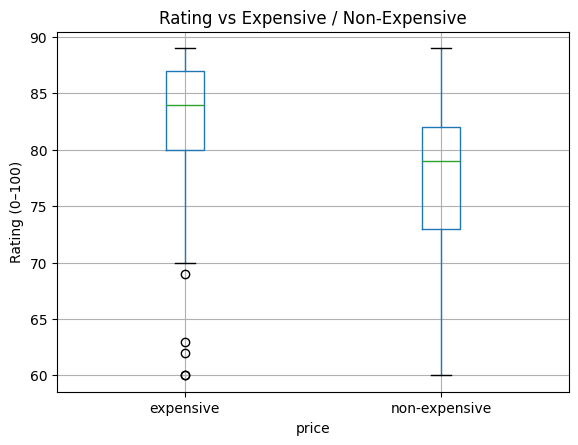

In [133]:
plt.figure(figsize=(8,6))
df.boxplot(column="rating", by="price")
plt.ylabel("Rating (0–100)")
plt.title("Rating vs Expensive / Non-Expensive")
plt.suptitle("")
plt.show()

<Figure size 800x600 with 0 Axes>

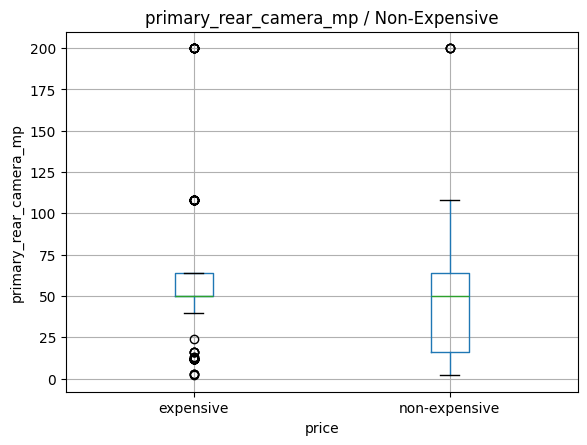

In [134]:
plt.figure(figsize=(8,6))
df.boxplot(column="primary_rear_camera_mp", by="price")
plt.ylabel("primary_rear_camera_mp")
plt.title("primary_rear_camera_mp / Non-Expensive")
plt.suptitle("")
plt.show()

<Figure size 800x600 with 0 Axes>

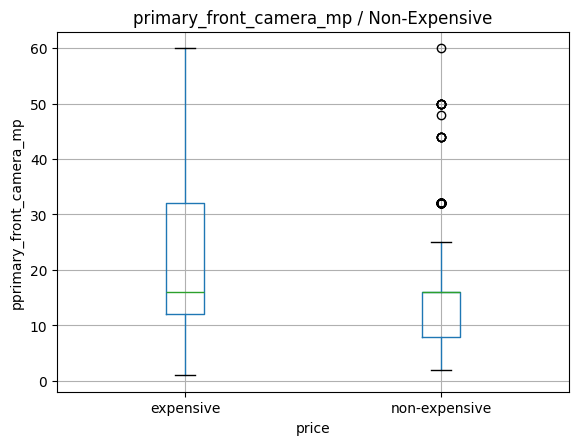

In [135]:
plt.figure(figsize=(8,6))
df.boxplot(column="primary_front_camera_mp", by="price")
plt.ylabel("pprimary_front_camera_mp")
plt.title("primary_front_camera_mp / Non-Expensive")
plt.suptitle("")
plt.show()

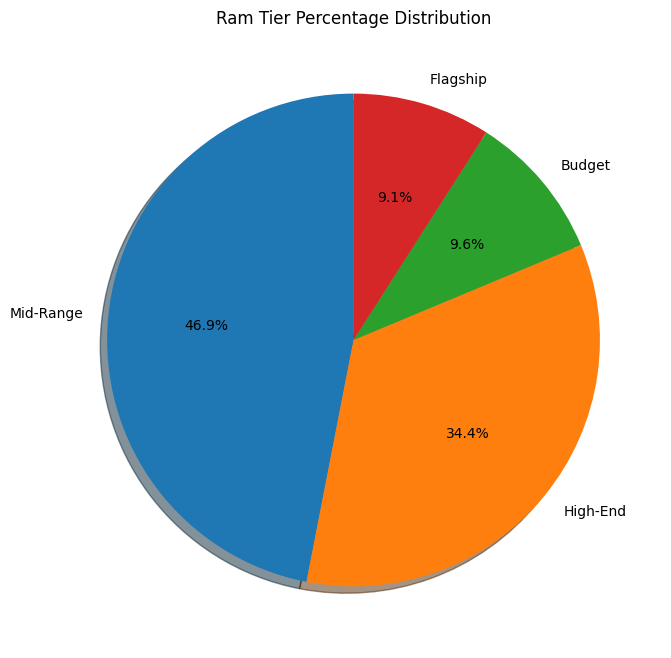

In [136]:
plt.figure(figsize=(8,8))
df["RAM Tier"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    shadow=True
)

plt.title("Ram Tier Percentage Distribution")
plt.ylabel("")  # removes the y-label
plt.show()

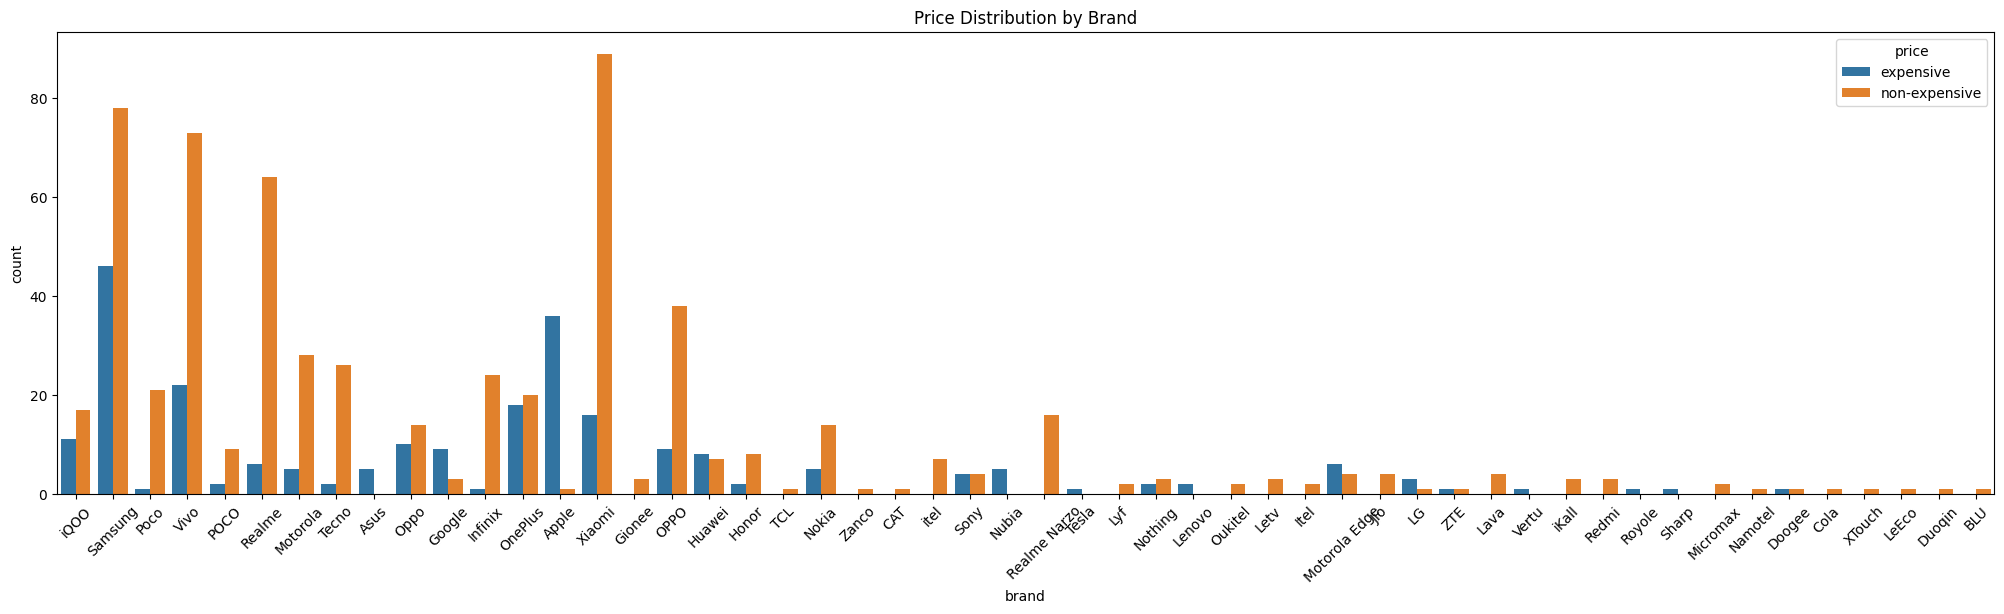

In [137]:
plt.figure(figsize=(25,6))
sns.countplot(data=df, x='brand', hue='price')
plt.xticks(rotation=45)
plt.title("Price Distribution by Brand")
plt.show()

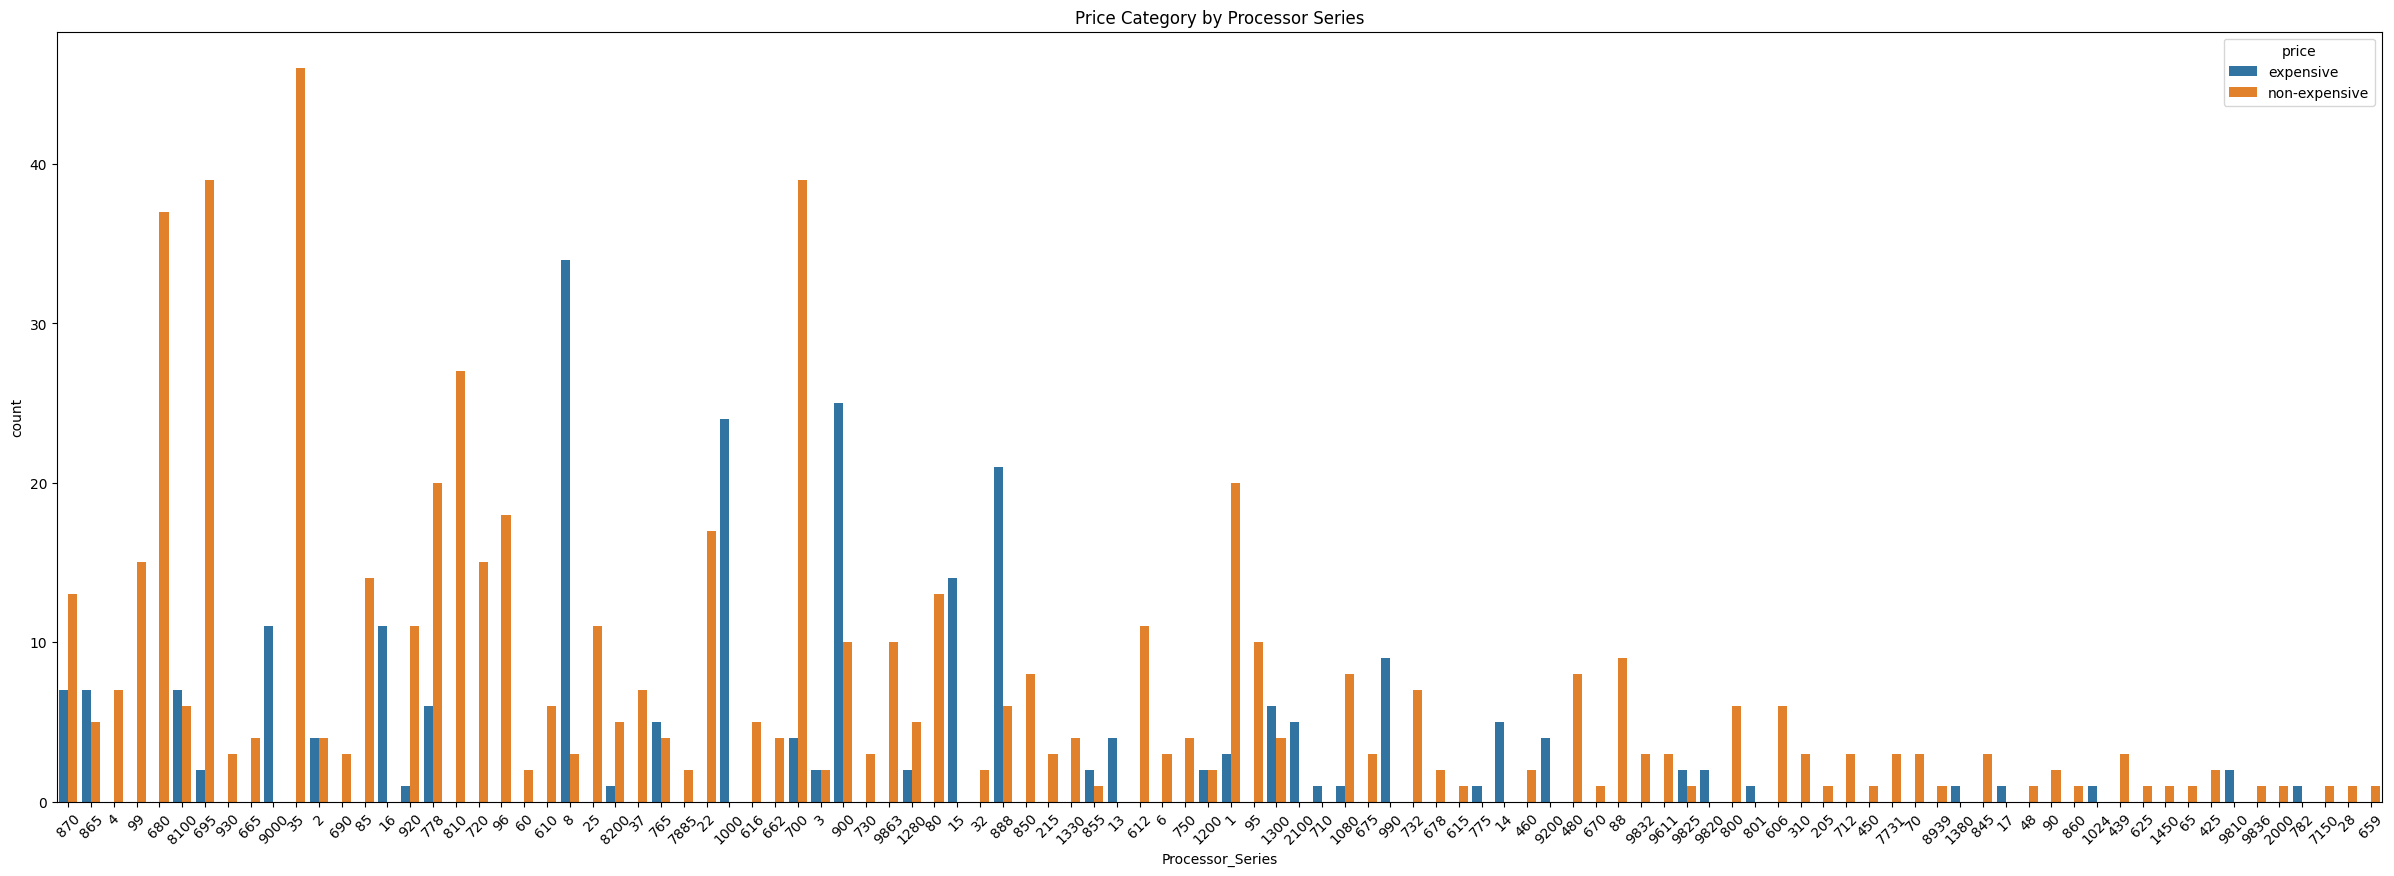

In [138]:
plt.figure(figsize=(30,10))
sns.countplot(data=df, x='Processor_Series', hue='price')
plt.xticks(rotation=45)
plt.title("Price Category by Processor Series")
plt.show()

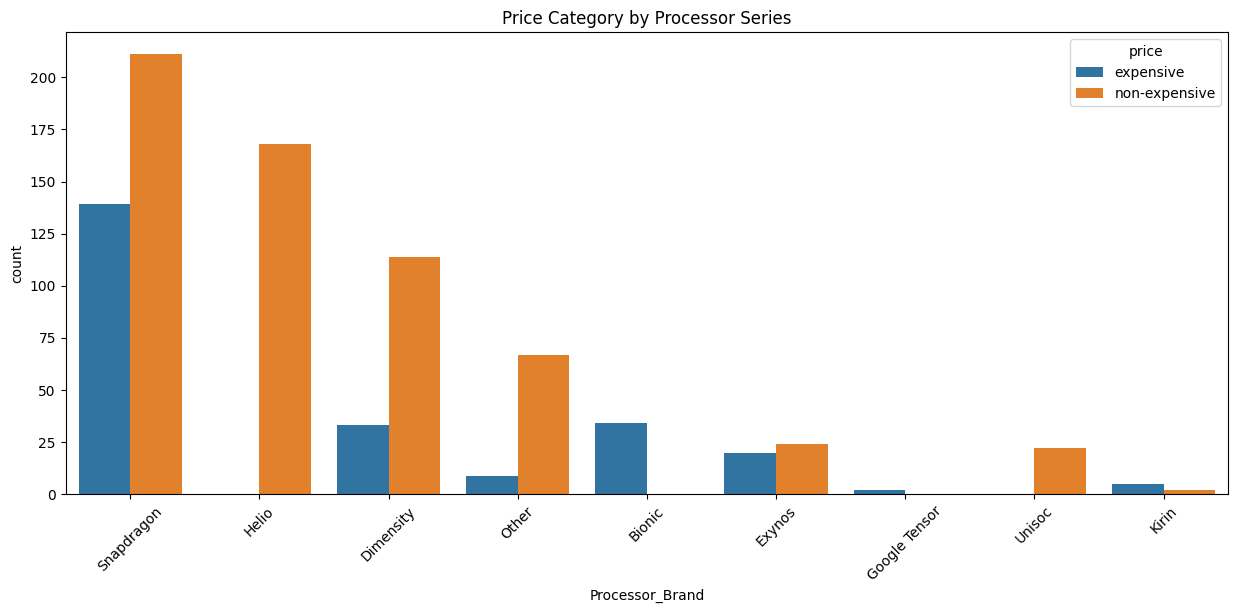

In [139]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Processor_Brand', hue='price')
plt.xticks(rotation=45)
plt.title("Price Category by Processor Series")
plt.show()

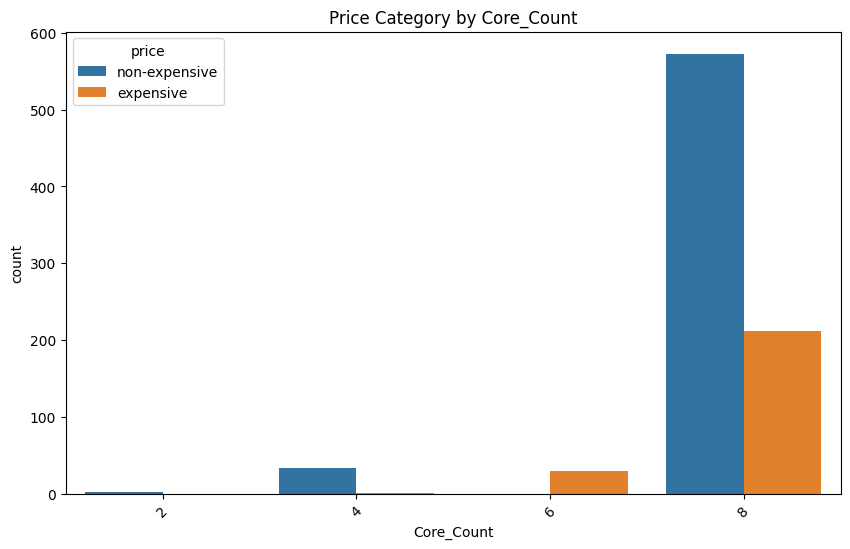

In [140]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Core_Count', hue='price')
plt.xticks(rotation=45)
plt.title("Price Category by Core_Count")
plt.show()

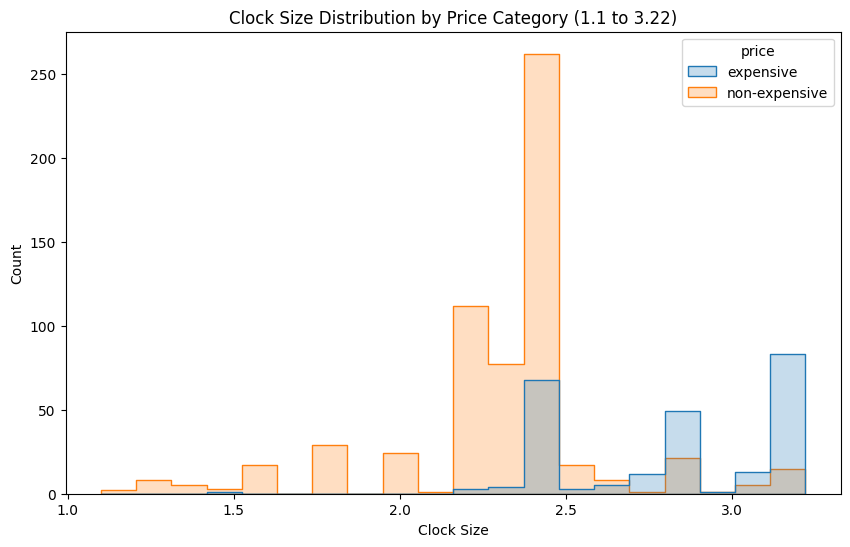

In [141]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Clock_Speed_GHz', hue='price', bins=20, element='step')
plt.title("Clock Size Distribution by Price Category (1.1 to 3.22)")
plt.xlabel("Clock Size")
plt.show()

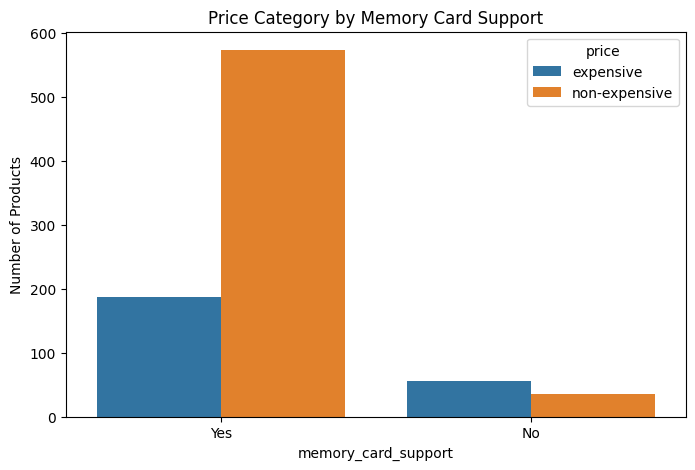

In [142]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='memory_card_support', hue='price')
plt.title("Price Category by Memory Card Support")
plt.ylabel("Number of Products")
plt.show()

In [143]:
def convert_to_gb(value):
    if pd.isna(value):
        return np.nan
    value = str(value).upper().strip()
    if 'TB' in value:
        return float(value.replace('TB','')) * 1024  # 1 TB = 1024 GB
    elif 'GB' in value:
        return float(value.replace('GB',''))
    else:
        return np.nan  # for unexpected formats

df['memory_card_size_gb'] = df['memory_card_size'].apply(convert_to_gb)

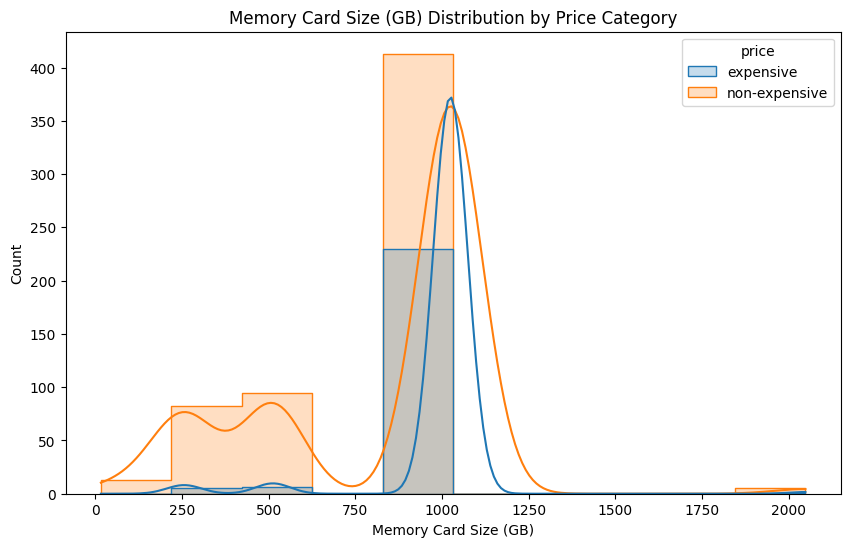

In [144]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='memory_card_size_gb', hue='price', bins=10, kde=True, element='step')
plt.title("Memory Card Size (GB) Distribution by Price Category")
plt.xlabel("Memory Card Size (GB)")
plt.show()

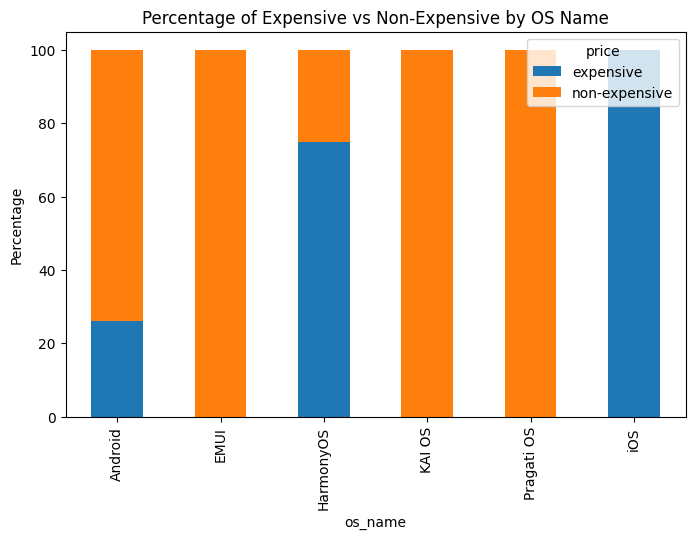

In [145]:
os_price = pd.crosstab(df['os_name'], df['price'], normalize='index') * 100
os_price.plot(kind='bar', stacked=True, figsize=(8,5))
plt.ylabel("Percentage")
plt.title("Percentage of Expensive vs Non-Expensive by OS Name")
plt.show()

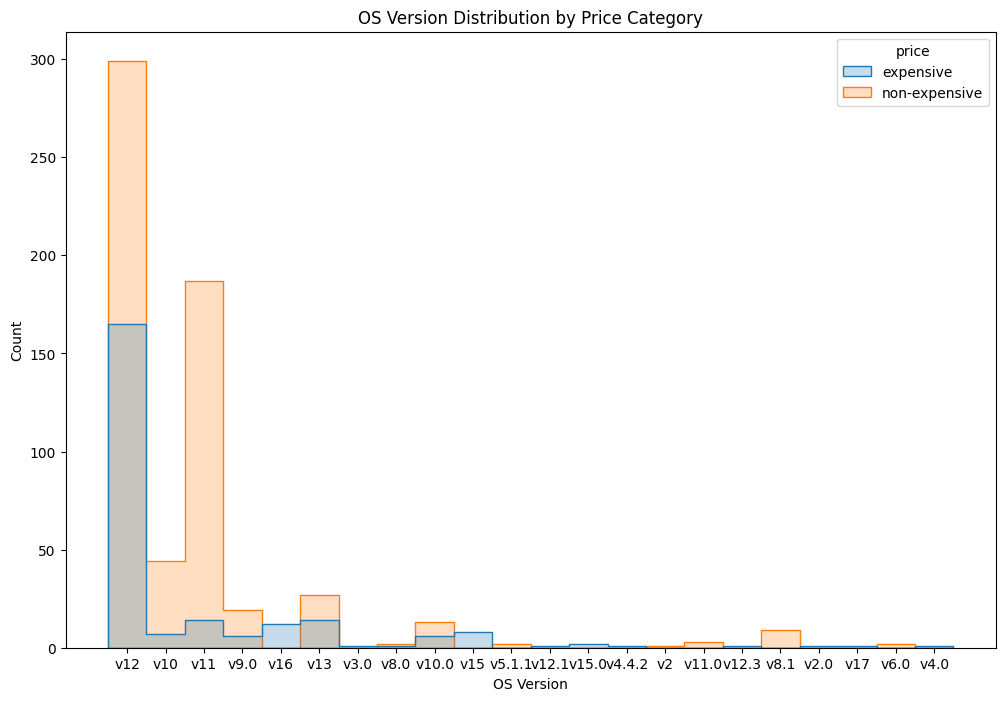

In [146]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='os_version', hue='price', bins=10, element='step')
plt.title("OS Version Distribution by Price Category")
plt.xlabel("OS Version")
plt.show()

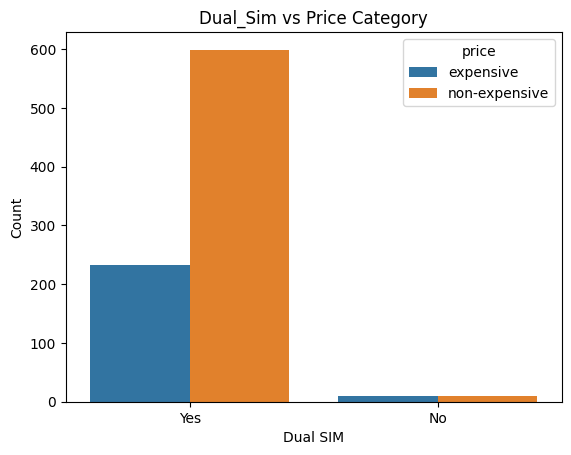

In [147]:
sns.countplot(data=df, x='Dual_Sim', hue='price')
plt.title('Dual_Sim vs Price Category')
plt.xlabel('Dual SIM')
plt.ylabel('Count')
plt.show()

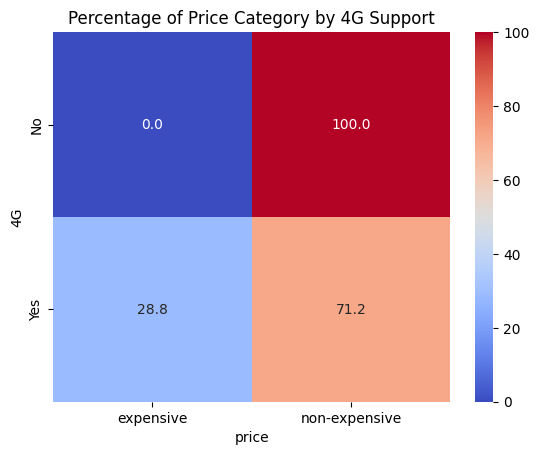

In [148]:
crosstab_4g = pd.crosstab(df['4G'], df['price'], normalize='index') * 100
sns.heatmap(crosstab_4g, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Percentage of Price Category by 4G Support')
plt.show()

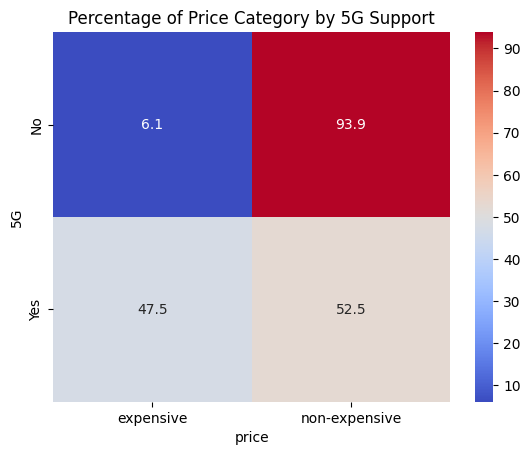

In [149]:
crosstab_5g = pd.crosstab(df['5G'], df['price'], normalize='index') * 100
sns.heatmap(crosstab_5g, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Percentage of Price Category by 5G Support')
plt.show()

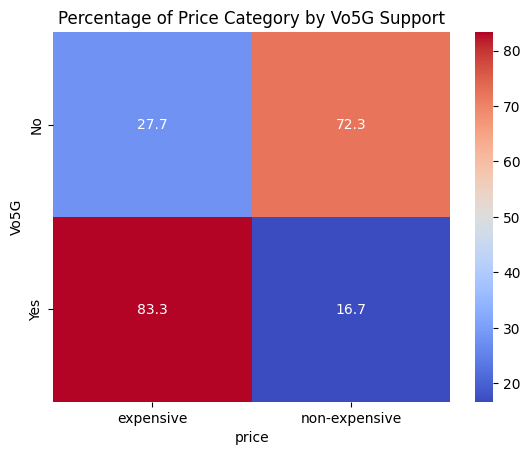

In [150]:
crosstab_vo5g = pd.crosstab(df['Vo5G'], df['price'], normalize='index') * 100
sns.heatmap(crosstab_vo5g, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Percentage of Price Category by Vo5G Support')
plt.show()

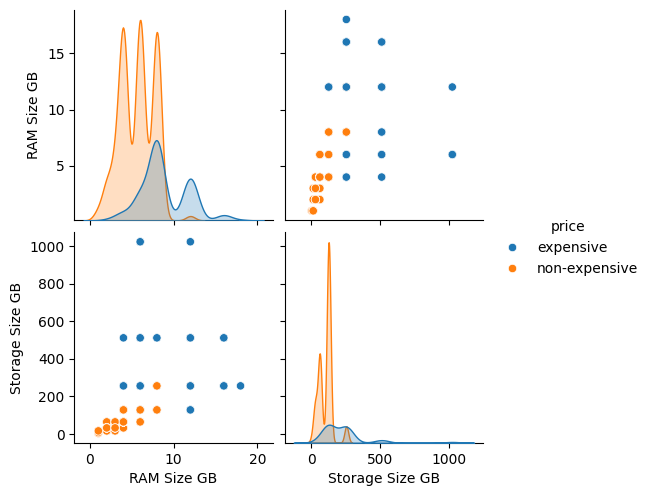

In [151]:
sns.pairplot(df, vars=['RAM Size GB','Storage Size GB'], hue='price')

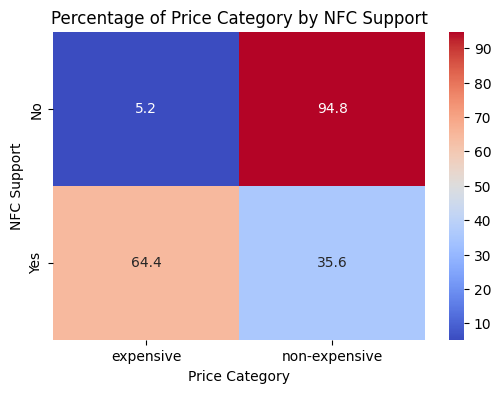

In [152]:
crosstab_nfc = pd.crosstab(df['NFC'], df['price'], normalize='index') * 100

plt.figure(figsize=(6,4))
sns.heatmap(crosstab_nfc, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Percentage of Price Category by NFC Support')
plt.ylabel('NFC Support')
plt.xlabel('Price Category')
plt.show()

## Preprocessing

In [153]:
df

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand,memory_card_size_gb
0,expensive,85,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,...,48,3,16,1,Yes,1 TB,Android,v12,iQOO,1024.0
1,non-expensive,88,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,...,12,3,32,1,Yes,1 TB,Android,v10,Samsung,1024.0
2,non-expensive,75,Yes,Yes,Yes,No,No,No,Snapdragon,4,...,50,2,8,1,Yes,1 TB,Android,v12,iQOO,1024.0
3,non-expensive,74,Yes,Yes,No,No,No,Yes,Helio,99,...,50,3,8,1,Yes,512 GB,Android,v12,Poco,512.0
4,non-expensive,80,Yes,Yes,No,No,No,No,Snapdragon,680,...,50,3,16,1,Yes,1 TB,Android,v12,Vivo,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,expensive,87,Yes,Yes,Yes,No,No,No,Dimensity,9000,...,108,3,32,1,Yes,1 TB,Android,v12,Vivo,1024.0
863,non-expensive,82,Yes,Yes,No,No,No,No,Helio,80,...,64,1,20,1,Yes,1 TB,Android,v11,Samsung,1024.0
864,non-expensive,75,Yes,Yes,No,No,Yes,No,Snapdragon,665,...,12,3,8,1,Yes,1 TB,Android,v10.0,Sony,1024.0
865,non-expensive,85,Yes,Yes,Yes,No,Yes,No,Dimensity,810,...,48,1,16,1,Yes,1 TB,Android,v11,BLU,1024.0


In [154]:
df = df.drop(["Performance_Tier","memory_card_size"],axis=1)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 866
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    850 non-null    object 
 1   rating                   850 non-null    int64  
 2   Dual_Sim                 850 non-null    object 
 3   4G                       850 non-null    object 
 4   5G                       850 non-null    object 
 5   Vo5G                     850 non-null    object 
 6   NFC                      850 non-null    object 
 7   IR_Blaster               850 non-null    object 
 8   Processor_Brand          850 non-null    object 
 9   Processor_Series         850 non-null    object 
 10  Core_Count               850 non-null    int64  
 11  Clock_Speed_GHz          850 non-null    float64
 12  RAM Size GB              850 non-null    float64
 13  Storage Size GB          850 non-null    float64
 14  RAM Tier                 850 no

In [156]:
df["Processor_Series"] = df["Processor_Series"].astype(int)

In [157]:
df_test['memory_card_size_gb'] = df_test['memory_card_size'].apply(convert_to_gb)
df_test

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,memory_card_size,os_name,os_version,brand,memory_card_size_gb
0,non-expensive,82.0,Yes,Yes,Yes,No,No,No,Dimensity,920,...,50.0,3.0,16.0,1.0,No,1 TB,Android,v12,Realme,1024.0
1,non-expensive,83.0,Yes,Yes,No,No,No,No,Dimensity,800,...,64.0,3.0,44.0,1.0,Yes,1 TB,Android,v11,Vivo,1024.0
2,expensive,89.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,900,...,50.0,3.0,32.0,1.0,Yes,1 TB,Android,v12,Realme,1024.0
3,non-expensive,81.0,Yes,Yes,Yes,No,Yes,Yes,Snapdragon,778,...,108.0,3.0,16.0,1.0,No,1 TB,Android,v13,Poco,1024.0
4,non-expensive,82.0,Yes,Yes,Yes,No,Yes,Yes,Dimensity,8100,...,64.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,Xiaomi,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,expensive,88.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,8,...,50.0,3.0,12.0,1.0,No,1 TB,Android,v12,Asus,1024.0
149,expensive,83.0,Yes,Yes,Yes,No,No,No,Snapdragon,900,...,64.0,3.0,16.0,1.0,Yes,1 TB,Android,v12,Motorola,1024.0
150,expensive,80.0,Yes,Yes,Yes,No,Yes,Yes,Snapdragon,900,...,50.0,3.0,32.0,1.0,Yes,1 TB,Android,v12,Xiaomi,1024.0
151,non-expensive,75.0,Yes,Yes,Yes,No,No,No,Dimensity,810,...,50.0,3.0,8.0,1.0,Yes,1 TB,Android,v12,Realme,1024.0


In [158]:
df_test = df_test.drop(["Performance_Tier","memory_card_size"],axis=1)


In [159]:
df_test

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,os_name,os_version,brand,memory_card_size_gb
0,non-expensive,82.0,Yes,Yes,Yes,No,No,No,Dimensity,920,...,Punch Hole,50.0,3.0,16.0,1.0,No,Android,v12,Realme,1024.0
1,non-expensive,83.0,Yes,Yes,No,No,No,No,Dimensity,800,...,Water Drop Notch,64.0,3.0,44.0,1.0,Yes,Android,v11,Vivo,1024.0
2,expensive,89.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,900,...,Punch Hole,50.0,3.0,32.0,1.0,Yes,Android,v12,Realme,1024.0
3,non-expensive,81.0,Yes,Yes,Yes,No,Yes,Yes,Snapdragon,778,...,Punch Hole,108.0,3.0,16.0,1.0,No,Android,v13,Poco,1024.0
4,non-expensive,82.0,Yes,Yes,Yes,No,Yes,Yes,Dimensity,8100,...,Punch Hole,64.0,3.0,16.0,1.0,Yes,Android,v12,Xiaomi,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,expensive,88.0,Yes,Yes,Yes,No,Yes,No,Snapdragon,8,...,No Notch,50.0,3.0,12.0,1.0,No,Android,v12,Asus,1024.0
149,expensive,83.0,Yes,Yes,Yes,No,No,No,Snapdragon,900,...,Punch Hole,64.0,3.0,16.0,1.0,Yes,Android,v12,Motorola,1024.0
150,expensive,80.0,Yes,Yes,Yes,No,Yes,Yes,Snapdragon,900,...,Punch Hole,50.0,3.0,32.0,1.0,Yes,Android,v12,Xiaomi,1024.0
151,non-expensive,75.0,Yes,Yes,Yes,No,No,No,Dimensity,810,...,Punch Hole,50.0,3.0,8.0,1.0,Yes,Android,v12,Realme,1024.0


In [160]:
def convert_os_version(val):
    if isinstance(val, str):
        val = val.lower().replace("v", "").strip()  # remove 'v'

        parts = val.split(".")  

        if len(parts) == 1:      # v12 → 12
            return int(parts[0])

        elif len(parts) == 2:    # v9.0 → 9.0
            return float(val)

        elif len(parts) == 3:    # v5.1.1 → 5.11
            return float(parts[0] + "." + parts[1] + parts[2])

    return None


In [161]:
df["os_version"] = df["os_version"].apply(convert_os_version)


In [162]:
df_test["os_version"] = df_test["os_version"].apply(convert_os_version)


In [163]:
df["os_name"].value_counts()

os_name
Android       816
iOS            26
HarmonyOS       4
EMUI            2
Pragati OS      1
KAI OS          1
Name: count, dtype: int64

In [164]:
df["brand"].value_counts()

brand
Samsung          124
Xiaomi           105
Vivo              95
Realme            70
OPPO              47
OnePlus           38
Apple             37
Motorola          33
Tecno             28
iQOO              28
Infinix           25
Oppo              24
Poco              22
Nokia             19
Realme Narzo      16
Huawei            15
Google            12
POCO              11
Honor             10
Motorola Edge     10
Sony               8
itel               7
Asus               5
Nubia              5
Nothing            5
LG                 4
Lava               4
Jio                4
iKall              3
Gionee             3
Letv               3
Redmi              3
ZTE                2
Oukitel            2
Lyf                2
Lenovo             2
Doogee             2
Micromax           2
Itel               2
TCL                1
CAT                1
Zanco              1
Tesla              1
Vertu              1
Sharp              1
Royole             1
Namotel            1
Cola   

In [165]:
df["brand"].unique()

array(['iQOO', 'Samsung', 'Poco', 'Vivo', 'POCO', 'Realme', 'Motorola',
       'Tecno', 'Asus', 'Oppo', 'Google', 'Infinix', 'OnePlus', 'Apple',
       'Xiaomi', 'Gionee', 'OPPO', 'Huawei', 'Honor', 'TCL', 'Nokia',
       'Zanco', 'CAT', 'itel', 'Sony', 'Nubia', 'Realme Narzo', 'Tesla',
       'Lyf', 'Nothing', 'Lenovo', 'Oukitel', 'Letv', 'Itel',
       'Motorola Edge', 'Jio', 'LG', 'ZTE', 'Lava', 'Vertu', 'iKall',
       'Redmi', 'Royole', 'Sharp', 'Micromax', 'Namotel', 'Doogee',
       'Cola', 'XTouch', 'LeEco', 'Duoqin', 'BLU'], dtype=object)

In [166]:
df["brand"]=df["brand"].str.capitalize()

In [167]:
df["brand"].value_counts()

brand
Samsung          124
Xiaomi           105
Vivo              95
Oppo              71
Realme            70
Oneplus           38
Apple             37
Motorola          33
Poco              33
Iqoo              28
Tecno             28
Infinix           25
Nokia             19
Realme narzo      16
Huawei            15
Google            12
Honor             10
Motorola edge     10
Itel               9
Sony               8
Asus               5
Nothing            5
Nubia              5
Lava               4
Jio                4
Lg                 4
Gionee             3
Letv               3
Redmi              3
Ikall              3
Lyf                2
Oukitel            2
Lenovo             2
Zte                2
Micromax           2
Doogee             2
Zanco              1
Tesla              1
Cat                1
Tcl                1
Vertu              1
Sharp              1
Royole             1
Namotel            1
Cola               1
Xtouch             1
Leeco              1
Duoqin 

In [168]:
df

,price,rating,Dual_Sim,4G,5G,Vo5G,NFC,IR_Blaster,Processor_Brand,Processor_Series,...,Notch_Type,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,num_front_cameras,memory_card_support,os_name,os_version,brand,memory_card_size_gb
0,expensive,85,Yes,Yes,Yes,No,Yes,No,Snapdragon,870,...,Punch Hole,48,3,16,1,Yes,Android,12.0,Iqoo,1024.0
1,non-expensive,88,Yes,Yes,Yes,No,Yes,No,Snapdragon,865,...,Punch Hole,12,3,32,1,Yes,Android,10.0,Samsung,1024.0
2,non-expensive,75,Yes,Yes,Yes,No,No,No,Snapdragon,4,...,Water Drop Notch,50,2,8,1,Yes,Android,12.0,Iqoo,1024.0
3,non-expensive,74,Yes,Yes,No,No,No,Yes,Helio,99,...,Water Drop Notch,50,3,8,1,Yes,Android,12.0,Poco,512.0
4,non-expensive,80,Yes,Yes,No,No,No,No,Snapdragon,680,...,Water Drop Notch,50,3,16,1,Yes,Android,12.0,Vivo,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,expensive,87,Yes,Yes,Yes,No,No,No,Dimensity,9000,...,Punch Hole,108,3,32,1,Yes,Android,12.0,Vivo,1024.0
863,non-expensive,82,Yes,Yes,No,No,No,No,Helio,80,...,Water Drop Notch,64,1,20,1,Yes,Android,11.0,Samsung,1024.0
864,non-expensive,75,Yes,Yes,No,No,Yes,No,Snapdragon,665,...,No Notch,12,3,8,1,Yes,Android,10.0,Sony,1024.0
865,non-expensive,85,Yes,Yes,Yes,No,Yes,No,Dimensity,810,...,No Notch,48,1,16,1,Yes,Android,11.0,Blu,1024.0


In [169]:
yes_no_cols = ["Dual_Sim","4G","5G","Vo5G","NFC","IR_Blaster","memory_card_support"]

df[yes_no_cols] = df[yes_no_cols].replace({"Yes": 1, "No": 0})


In [170]:
df['RAM Tier'].value_counts()

RAM Tier
Mid-Range    399
High-End     292
Budget        82
Flagship      77
Name: count, dtype: int64

In [171]:
df["price"].value_counts()

price
non-expensive    608
expensive        242
Name: count, dtype: int64

In [172]:
df["price"] = df["price"].replace({"expensive":1, "non-expensive":0})

In [173]:
ram_order = {"Budget": 1, "Mid-Range": 2, "High-End": 3, "Flagship": 4}
df["RAM Tier"] = df["RAM Tier"].map(ram_order)

In [174]:

from category_encoders import TargetEncoder


te = TargetEncoder(cols=["brand"])
df["brand_encoded"] = te.fit_transform(df["brand"], df["price"])
df = df.drop("brand", axis=1)  


In [175]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_data = df[numeric_cols]

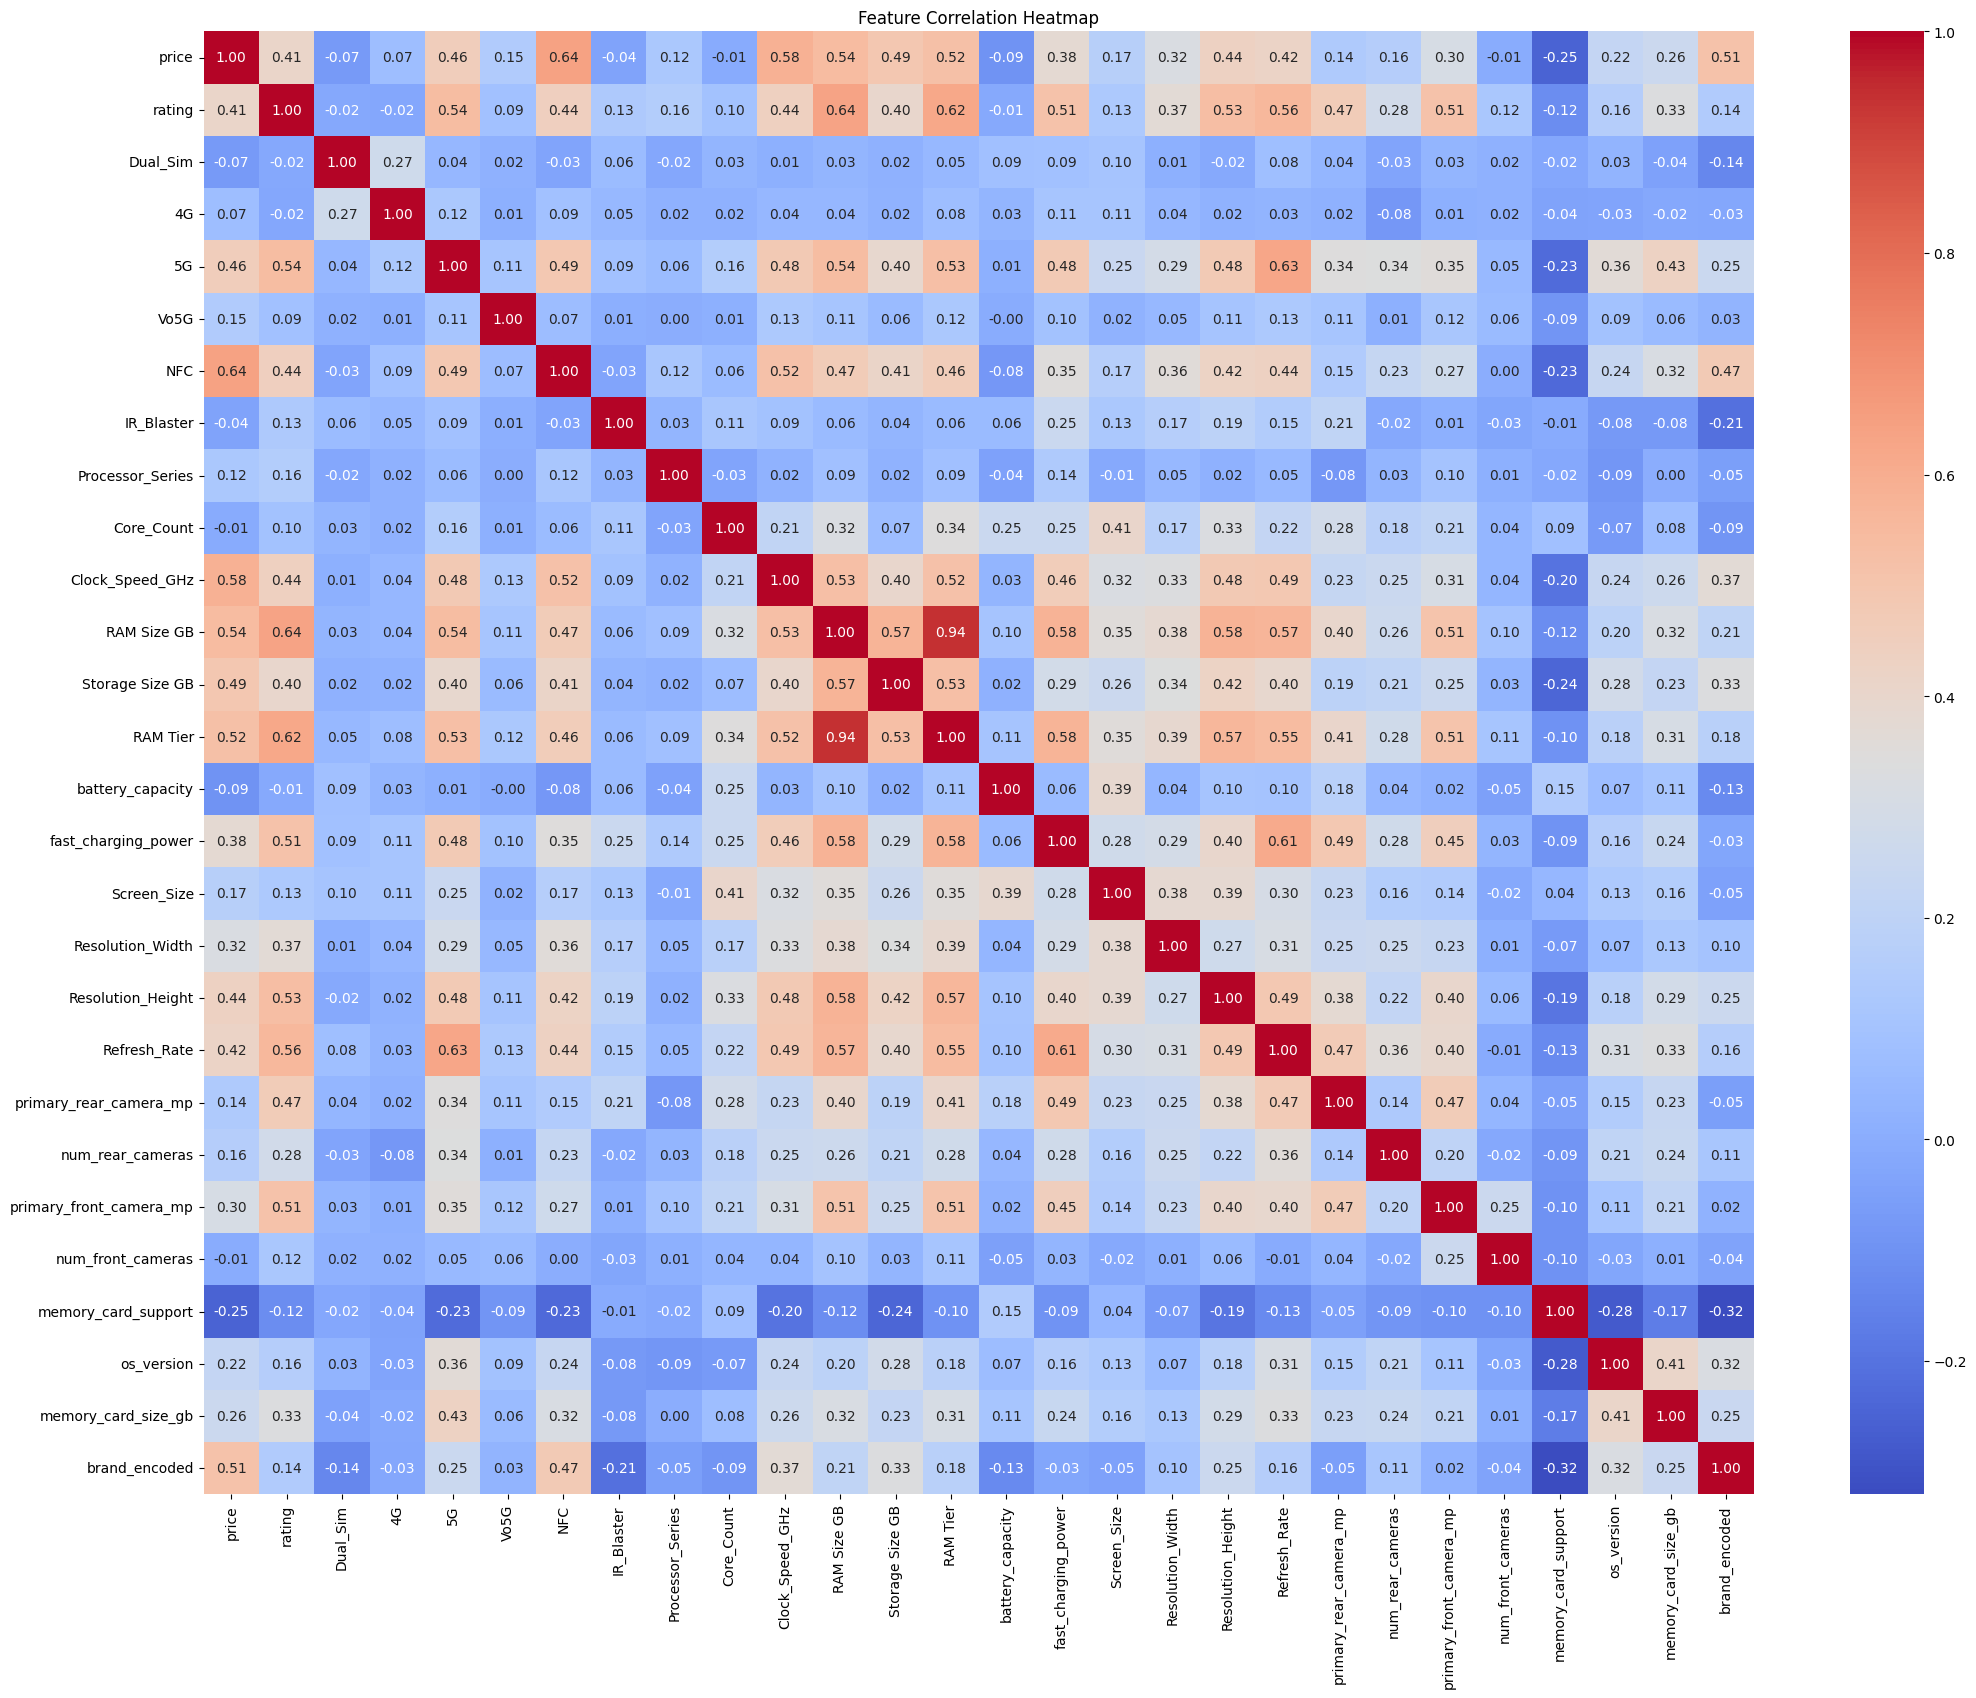

In [176]:
corr = numeric_data.corr()
plt.figure(figsize=(25,19))  
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [177]:
threshold = 0.13
corr_with_target = df[numeric_cols].corr()['price'].abs()
cols_to_keep = corr_with_target[corr_with_target >= threshold].index
df_selected = df[cols_to_keep]


In [178]:
df_selected.columns

Index(['price', 'rating', '5G', 'Vo5G', 'NFC', 'Clock_Speed_GHz',
       'RAM Size GB', 'Storage Size GB', 'RAM Tier', 'fast_charging_power',
       'Screen_Size', 'Resolution_Width', 'Resolution_Height', 'Refresh_Rate',
       'primary_rear_camera_mp', 'num_rear_cameras', 'primary_front_camera_mp',
       'memory_card_support', 'os_version', 'memory_card_size_gb',
       'brand_encoded'],
      dtype='object')

In [179]:
df_test_new = df_test[['price', 'rating', '5G', 'Vo5G', 'NFC', 'Clock_Speed_GHz',
       'RAM Size GB', 'Storage Size GB', 'RAM Tier', 'fast_charging_power',
       'Screen_Size', 'Resolution_Width', 'Resolution_Height', 'Refresh_Rate',
       'primary_rear_camera_mp', 'num_rear_cameras', 'primary_front_camera_mp',
       'memory_card_support', 'os_version', 'memory_card_size_gb','brand',"Notch_Type","os_name","Processor_Brand"]]

In [180]:
df_selected

,price,rating,5G,Vo5G,NFC,Clock_Speed_GHz,RAM Size GB,Storage Size GB,RAM Tier,fast_charging_power,...,Resolution_Width,Resolution_Height,Refresh_Rate,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,memory_card_support,os_version,memory_card_size_gb,brand_encoded
0,1,85,1,0,1,3.20,12.0,256.0,4,66,...,1080,2400,120,48,3,16,1,12.0,1024.0,0.392857
1,0,88,1,0,1,2.84,8.0,128.0,3,0,...,1080,2400,120,12,3,32,1,10.0,1024.0,0.370968
2,0,75,1,0,0,2.40,4.0,64.0,2,18,...,1080,2408,120,50,2,8,1,12.0,1024.0,0.392857
3,0,74,0,0,0,2.20,4.0,64.0,2,18,...,1080,2400,90,50,3,8,1,12.0,512.0,0.090909
4,0,80,0,0,0,2.40,8.0,128.0,3,44,...,1080,2408,90,50,3,16,1,12.0,1024.0,0.231579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,87,1,0,0,3.20,12.0,256.0,4,120,...,1080,2400,144,108,3,32,1,12.0,1024.0,0.231579
863,0,82,0,0,0,2.40,8.0,128.0,3,15,...,1080,2400,90,64,1,20,1,11.0,1024.0,0.370968
864,0,75,0,0,1,2.40,4.0,128.0,2,18,...,1080,2520,90,12,3,8,1,10.0,1024.0,0.499804
865,0,85,1,0,1,2.40,8.0,128.0,3,0,...,1080,2460,60,48,1,16,1,11.0,1024.0,0.284706


In [181]:
df_selected["RAM Tier"].unique()

array([4, 3, 2, 1])

In [182]:
add_columns = ["Notch_Type","os_name","Processor_Brand"]

In [183]:
final_cols = list(cols_to_keep) + add_columns
df_selected = df[final_cols]


In [184]:
# df_selected = pd.get_dummies(df_selected, columns=["Notch_Type", "os_name","Processor_Brand"],
#                     drop_first=True, dtype=int)

In [185]:
df_selected

,price,rating,5G,Vo5G,NFC,Clock_Speed_GHz,RAM Size GB,Storage Size GB,RAM Tier,fast_charging_power,...,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,memory_card_support,os_version,memory_card_size_gb,brand_encoded,Notch_Type,os_name,Processor_Brand
0,1,85,1,0,1,3.20,12.0,256.0,4,66,...,48,3,16,1,12.0,1024.0,0.392857,Punch Hole,Android,Snapdragon
1,0,88,1,0,1,2.84,8.0,128.0,3,0,...,12,3,32,1,10.0,1024.0,0.370968,Punch Hole,Android,Snapdragon
2,0,75,1,0,0,2.40,4.0,64.0,2,18,...,50,2,8,1,12.0,1024.0,0.392857,Water Drop Notch,Android,Snapdragon
3,0,74,0,0,0,2.20,4.0,64.0,2,18,...,50,3,8,1,12.0,512.0,0.090909,Water Drop Notch,Android,Helio
4,0,80,0,0,0,2.40,8.0,128.0,3,44,...,50,3,16,1,12.0,1024.0,0.231579,Water Drop Notch,Android,Snapdragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,87,1,0,0,3.20,12.0,256.0,4,120,...,108,3,32,1,12.0,1024.0,0.231579,Punch Hole,Android,Dimensity
863,0,82,0,0,0,2.40,8.0,128.0,3,15,...,64,1,20,1,11.0,1024.0,0.370968,Water Drop Notch,Android,Helio
864,0,75,0,0,1,2.40,4.0,128.0,2,18,...,12,3,8,1,10.0,1024.0,0.499804,No Notch,Android,Snapdragon
865,0,85,1,0,1,2.40,8.0,128.0,3,0,...,48,1,16,1,11.0,1024.0,0.284706,No Notch,Android,Dimensity


In [186]:
df_test_new["price"] = df_test_new["price"].replace({"expensive":1, "non-expensive":0})

In [187]:
ram_order = {"Budget": 1, "Mid-Range": 2, "High-End": 3, "Flagship": 4}
df_test_new["RAM Tier"] = df_test_new["RAM Tier"].map(ram_order)

In [188]:
yes_no_cols = ["5G","Vo5G","NFC","memory_card_support"]

df_test_new[yes_no_cols] = df_test_new[yes_no_cols].replace({"Yes": 1, "No": 0})


In [189]:
df_test_new

,price,rating,5G,Vo5G,NFC,Clock_Speed_GHz,RAM Size GB,Storage Size GB,RAM Tier,fast_charging_power,...,primary_rear_camera_mp,num_rear_cameras,primary_front_camera_mp,memory_card_support,os_version,memory_card_size_gb,brand,Notch_Type,os_name,Processor_Brand
0,0,82.0,1,0,0,2.50,8.0,256.0,3,60,...,50.0,3.0,16.0,0,12.0,1024.0,Realme,Punch Hole,Android,Dimensity
1,0,83.0,0,0,0,2.40,8.0,128.0,3,33,...,64.0,3.0,44.0,1,11.0,1024.0,Vivo,Water Drop Notch,Android,Dimensity
2,1,89.0,1,0,1,2.40,8.0,128.0,3,65,...,50.0,3.0,32.0,1,12.0,1024.0,Realme,Punch Hole,Android,Snapdragon
3,0,81.0,1,0,1,2.40,6.0,128.0,2,67,...,108.0,3.0,16.0,0,13.0,1024.0,Poco,Punch Hole,Android,Snapdragon
4,0,82.0,1,0,1,2.85,6.0,128.0,2,67,...,64.0,3.0,16.0,1,12.0,1024.0,Xiaomi,Punch Hole,Android,Dimensity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1,88.0,1,0,1,3.20,18.0,512.0,4,65,...,50.0,3.0,12.0,0,12.0,1024.0,Asus,No Notch,Android,Snapdragon
149,1,83.0,1,0,0,2.40,8.0,128.0,3,2,...,64.0,3.0,16.0,1,12.0,1024.0,Motorola,Punch Hole,Android,Snapdragon
150,1,80.0,1,0,1,2.40,12.0,256.0,4,120,...,50.0,3.0,32.0,1,12.0,1024.0,Xiaomi,Punch Hole,Android,Snapdragon
151,0,75.0,1,0,0,2.40,4.0,64.0,2,18,...,50.0,3.0,8.0,1,12.0,1024.0,Realme,Punch Hole,Android,Dimensity


In [190]:
df_test_new["brand"] = df_test_new["brand"].str.capitalize()

In [191]:
df_test_new["brand_encoded"] = te.transform(df_test_new["brand"])
df_test_new = df_test_new.drop("brand", axis=1)


In [192]:
from sklearn.preprocessing import OneHotEncoder
# Columns to encode
cols_to_encode = ['Notch_Type', 'os_name', 'Processor_Brand']


ohe = OneHotEncoder(sparse_output=False, drop=None, dtype=int, handle_unknown='ignore')


ohe_train = ohe.fit_transform(df_selected[cols_to_encode])
df_selected_ohe = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(cols_to_encode), index=df_selected.index)
ohe_test = ohe.transform(df_test_new[cols_to_encode])
df_test_ohe = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(cols_to_encode), index=df_test.index)

# Drop original categorical columns
df_selected = df_selected.drop(cols_to_encode, axis=1)
df_test_new = df_test_new.drop(cols_to_encode, axis=1)

# Concatenate encoded columns
df_selected = pd.concat([df_selected, df_selected_ohe], axis=1)
df_test_new = pd.concat([df_test_new, df_test_ohe], axis=1)



In [193]:
df_selected

,price,rating,5G,Vo5G,NFC,Clock_Speed_GHz,RAM Size GB,Storage Size GB,RAM Tier,fast_charging_power,...,os_name_iOS,Processor_Brand_Bionic,Processor_Brand_Dimensity,Processor_Brand_Exynos,Processor_Brand_Google Tensor,Processor_Brand_Helio,Processor_Brand_Kirin,Processor_Brand_Other,Processor_Brand_Snapdragon,Processor_Brand_Unisoc
0,1,85,1,0,1,3.20,12.0,256.0,4,66,...,0,0,0,0,0,0,0,0,1,0
1,0,88,1,0,1,2.84,8.0,128.0,3,0,...,0,0,0,0,0,0,0,0,1,0
2,0,75,1,0,0,2.40,4.0,64.0,2,18,...,0,0,0,0,0,0,0,0,1,0
3,0,74,0,0,0,2.20,4.0,64.0,2,18,...,0,0,0,0,0,1,0,0,0,0
4,0,80,0,0,0,2.40,8.0,128.0,3,44,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,87,1,0,0,3.20,12.0,256.0,4,120,...,0,0,1,0,0,0,0,0,0,0
863,0,82,0,0,0,2.40,8.0,128.0,3,15,...,0,0,0,0,0,1,0,0,0,0
864,0,75,0,0,1,2.40,4.0,128.0,2,18,...,0,0,0,0,0,0,0,0,1,0
865,0,85,1,0,1,2.40,8.0,128.0,3,0,...,0,0,1,0,0,0,0,0,0,0


In [194]:
df_test_new

,price,rating,5G,Vo5G,NFC,Clock_Speed_GHz,RAM Size GB,Storage Size GB,RAM Tier,fast_charging_power,...,os_name_iOS,Processor_Brand_Bionic,Processor_Brand_Dimensity,Processor_Brand_Exynos,Processor_Brand_Google Tensor,Processor_Brand_Helio,Processor_Brand_Kirin,Processor_Brand_Other,Processor_Brand_Snapdragon,Processor_Brand_Unisoc
0,0,82.0,1,0,0,2.50,8.0,256.0,3,60,...,0,0,1,0,0,0,0,0,0,0
1,0,83.0,0,0,0,2.40,8.0,128.0,3,33,...,0,0,1,0,0,0,0,0,0,0
2,1,89.0,1,0,1,2.40,8.0,128.0,3,65,...,0,0,0,0,0,0,0,0,1,0
3,0,81.0,1,0,1,2.40,6.0,128.0,2,67,...,0,0,0,0,0,0,0,0,1,0
4,0,82.0,1,0,1,2.85,6.0,128.0,2,67,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1,88.0,1,0,1,3.20,18.0,512.0,4,65,...,0,0,0,0,0,0,0,0,1,0
149,1,83.0,1,0,0,2.40,8.0,128.0,3,2,...,0,0,0,0,0,0,0,0,1,0
150,1,80.0,1,0,1,2.40,12.0,256.0,4,120,...,0,0,0,0,0,0,0,0,1,0
151,0,75.0,1,0,0,2.40,4.0,64.0,2,18,...,0,0,1,0,0,0,0,0,0,0


In [195]:
X_train = df_selected.drop("price", axis=1)
y_train = df_selected["price"]

X_test = df_test_new.drop("price", axis=1, errors='ignore')
y_test = df_test_new["price"]


In [196]:
X_test

,rating,5G,Vo5G,NFC,Clock_Speed_GHz,RAM Size GB,Storage Size GB,RAM Tier,fast_charging_power,Screen_Size,...,os_name_iOS,Processor_Brand_Bionic,Processor_Brand_Dimensity,Processor_Brand_Exynos,Processor_Brand_Google Tensor,Processor_Brand_Helio,Processor_Brand_Kirin,Processor_Brand_Other,Processor_Brand_Snapdragon,Processor_Brand_Unisoc
0,82.0,1,0,0,2.50,8.0,256.0,3,60,6.40,...,0,0,1,0,0,0,0,0,0,0
1,83.0,0,0,0,2.40,8.0,128.0,3,33,6.44,...,0,0,1,0,0,0,0,0,0,0
2,89.0,1,0,1,2.40,8.0,128.0,3,65,6.70,...,0,0,0,0,0,0,0,0,1,0
3,81.0,1,0,1,2.40,6.0,128.0,2,67,6.67,...,0,0,0,0,0,0,0,0,1,0
4,82.0,1,0,1,2.85,6.0,128.0,2,67,6.60,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,88.0,1,0,1,3.20,18.0,512.0,4,65,6.78,...,0,0,0,0,0,0,0,0,1,0
149,83.0,1,0,0,2.40,8.0,128.0,3,2,6.67,...,0,0,0,0,0,0,0,0,1,0
150,80.0,1,0,1,2.40,12.0,256.0,4,120,6.73,...,0,0,0,0,0,0,0,0,1,0
151,75.0,1,0,0,2.40,4.0,64.0,2,18,6.60,...,0,0,1,0,0,0,0,0,0,0


In [197]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# X_train_scaled= scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

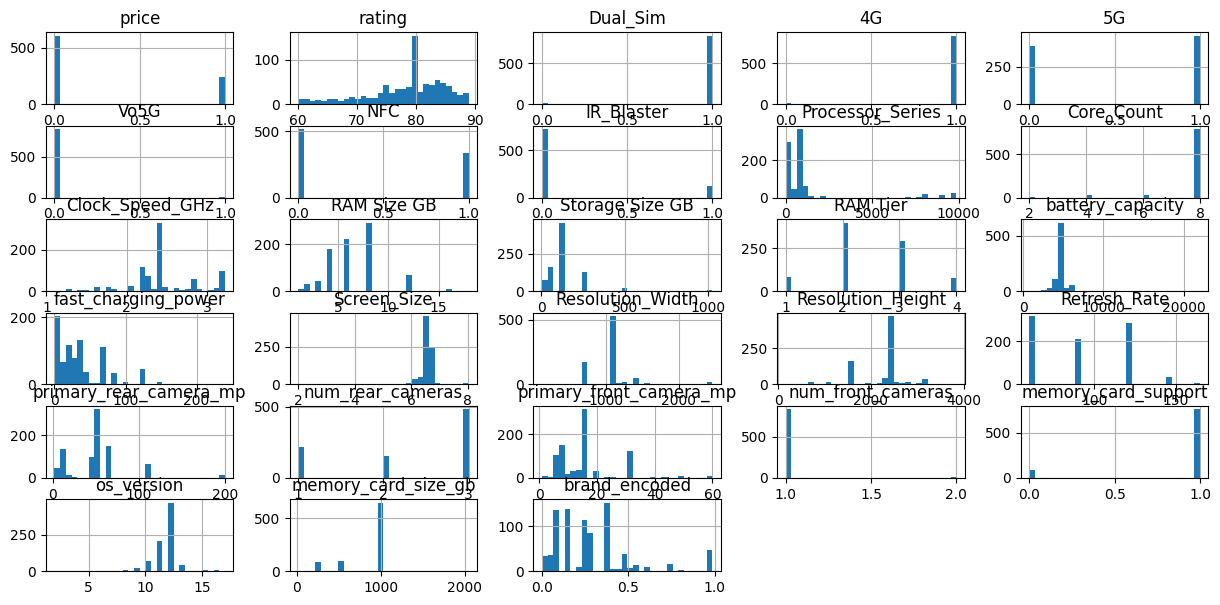

In [198]:
df.hist(bins=30,figsize=(15,7))
plt.show()

In [199]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr = (y_pred_lr > 0.5).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.8881578947368421


In [200]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
print(f"Baseline Random Forest Accuracy: {accuracy_score(y_test,y_pred_rf)}")

Baseline Random Forest Accuracy: 0.9276315789473685


In [201]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train,y_train)
y_pred_gb=gb_model.predict(X_test)
print(f"Baseline Gradient Boosting Accuracy: {accuracy_score(y_test,y_pred_gb)}")

Baseline Gradient Boosting Accuracy: 0.9342105263157895


In [202]:
models = {
    "Logistic Regression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", n_estimators=300, random_state=42)
}
results={}
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    duration = time.time() - start
    report=classification_report(y_test,y_pred)

    results[name] = {
        "Accuracy": acc,
        "Time (s)": duration
    }

    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Training + Prediction time: {duration:.2f} sec")
    print("Classification Report:")
    print(report)


Logistic Regression
Accuracy: 0.8882
Training + Prediction time: 0.81 sec
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       109
           1       0.77      0.86      0.81        43

    accuracy                           0.89       152
   macro avg       0.86      0.88      0.87       152
weighted avg       0.89      0.89      0.89       152


Random Forest
Accuracy: 0.9342
Training + Prediction time: 1.25 sec
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       109
           1       0.87      0.91      0.89        43

    accuracy                           0.93       152
   macro avg       0.91      0.93      0.92       152
weighted avg       0.94      0.93      0.93       152


XGBoost
Accuracy: 0.9342
Training + Prediction time: 1.51 sec
Classification Report:
              precision    recall  f1-score   support

           0   

In [203]:
models_and_grids = {
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'learning_rate': [0.05, 0.1, 0.2],
         'max_depth': [3, 5]}
    ),

    "LogisticRegression": (
        LogisticRegression(max_iter=1000, random_state=42),
        {'C': [0.1, 1, 10],
         'penalty': ['l2'],
         'class_weight': [None, 'balanced']}
    ),

    "KNN": (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}
    )
}

# --------------------------
# 4. Train & evaluate
# --------------------------
results = {}
for name, (model, param_grid) in models_and_grids.items():
    print(f"\n🔍 Training {name}...")
    Xtr, Xte = X_train,X_test
    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid.fit(Xtr, y_train)
    y_pred = grid.best_estimator_.predict(Xte)

    print(f"✅ Best {name}: {grid.best_params_}")
    print(classification_report(y_test, y_pred, digits=3))
    results[name] = (grid.best_params_, classification_report(y_test, y_pred, digits=3, output_dict=True))


🔍 Training RandomForest...


✅ Best RandomForest: {'class_weight': None, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0      0.953     0.936     0.944       109
           1      0.844     0.884     0.864        43

    accuracy                          0.921       152
   macro avg      0.899     0.910     0.904       152
weighted avg      0.922     0.921     0.922       152


🔍 Training DecisionTree...
✅ Best DecisionTree: {'class_weight': None, 'max_depth': None, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0      0.944     0.927     0.935       109
           1      0.822     0.860     0.841        43

    accuracy                          0.908       152
   macro avg      0.883     0.894     0.888       152
weighted avg      0.909     0.908     0.909       152


🔍 Training GradientBoosting...
✅ Best GradientBoosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
     

/home/youssless/temp_nb/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/youssless/temp_nb/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

✅ Best LogisticRegression: {'C': 1, 'class_weight': None, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0      0.934     0.908     0.921       109
           1      0.783     0.837     0.809        43

    accuracy                          0.888       152
   macro avg      0.858     0.873     0.865       152
weighted avg      0.891     0.888     0.889       152


🔍 Training KNN...
✅ Best KNN: {'n_neighbors': 3, 'weights': 'distance'}
              precision    recall  f1-score   support

           0      0.935     0.917     0.926       109
           1      0.800     0.837     0.818        43

    accuracy                          0.895       152
   macro avg      0.867     0.877     0.872       152
weighted avg      0.897     0.895     0.895       152



In [204]:
print("Before SMOTE:", y_train.value_counts())

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: price
0    608
1    242
Name: count, dtype: int64
After SMOTE: price
1    608
0    608
Name: count, dtype: int64


Classification Report (SMOTE + Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       109
           1       0.56      0.77      0.65        43

    accuracy                           0.76       152
   macro avg       0.73      0.76      0.73       152
weighted avg       0.80      0.76      0.77       152

Confusion Matrix:
[[83 26]
 [10 33]]
ROC-AUC: 0.838062726690847


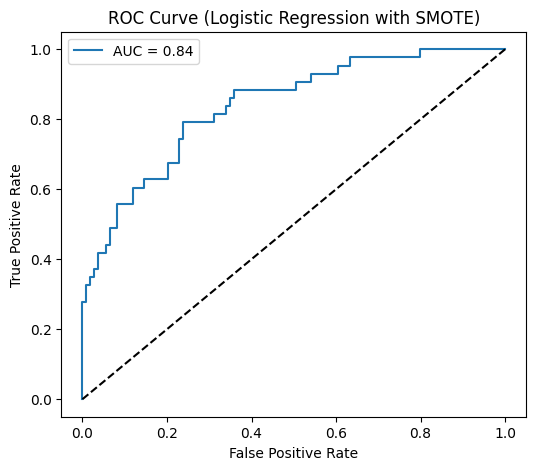

In [205]:
lr_model_smote=LogisticRegression(random_state=42)
lr_model_smote.fit(x_train_res,y_train_res)
y_pred_lr=lr_model_smote.predict(X_test)
y_proba_lr=lr_model_smote.predict_proba(X_test)[:,1]
print("Classification Report (SMOTE + Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

# ✅ Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm)

# ✅ ROC-AUC score
roc_auc = roc_auc_score(y_test,y_proba_lr)
print("ROC-AUC:", roc_auc)

# ✅ Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression with SMOTE)")
plt.legend()
plt.show()

=== Classification Report (SMOTE + Random Forest) ===
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       109
           1       0.83      0.91      0.87        43

    accuracy                           0.92       152
   macro avg       0.90      0.92      0.91       152
weighted avg       0.92      0.92      0.92       152

Confusion Matrix:
 [[101   8]
 [  4  39]]
ROC-AUC: 0.9653296351610838


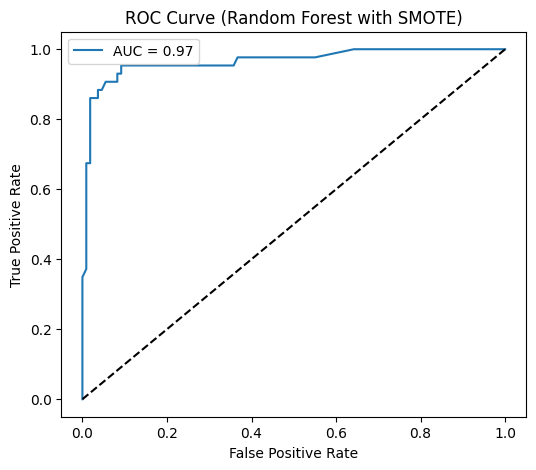

In [206]:
rf_model=RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(x_train_res,y_train_res)
y_pred_rf=rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]
y_pred_rf_train = rf_model.predict(x_train_res)

print("=== Classification Report (SMOTE + Random Forest) ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_rf):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest with SMOTE)")
plt.legend()
plt.show()

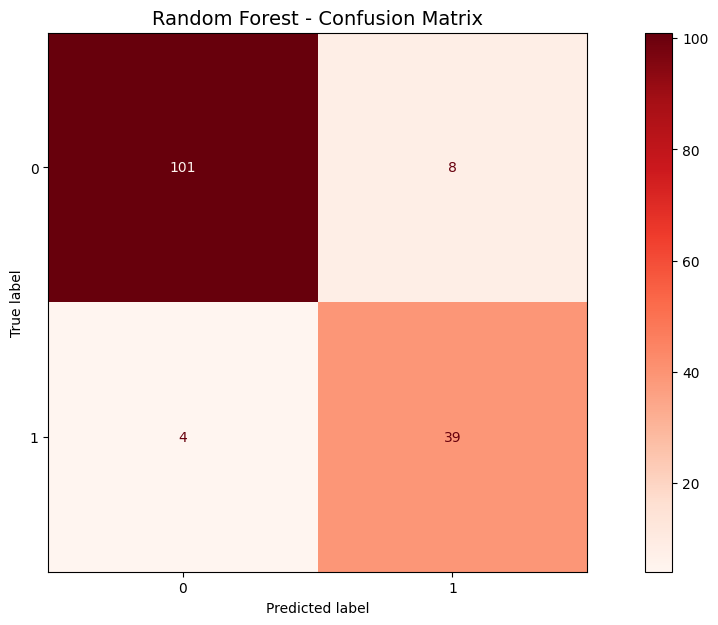

In [207]:
cm=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model.classes_)
fig,ax=plt.subplots(figsize=(15,7))
disp.plot(cmap=plt.cm.Reds,ax=ax,values_format='d')
plt.title('Random Forest - Confusion Matrix',fontsize=14)
plt.savefig("conf_matrix_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

                          Feature    Importance
4                 Clock_Speed_GHz  1.727147e-01
3                             NFC  1.082085e-01
19                  brand_encoded  8.614272e-02
5                     RAM Size GB  7.156524e-02
6                 Storage Size GB  5.348497e-02
0                          rating  5.025081e-02
11              Resolution_Height  4.954004e-02
12                   Refresh_Rate  4.808735e-02
8             fast_charging_power  4.453209e-02
9                     Screen_Size  4.178787e-02
25    Notch_Type_Water Drop Notch  3.833321e-02
15        primary_front_camera_mp  3.664053e-02
1                              5G  2.715151e-02
10               Resolution_Width  2.549888e-02
7                        RAM Tier  2.135285e-02
13         primary_rear_camera_mp  2.051400e-02
17                     os_version  1.915912e-02
16            memory_card_support  1.495765e-02
33      Processor_Brand_Dimensity  1.258105e-02
32         Processor_Brand_Bionic  1.080

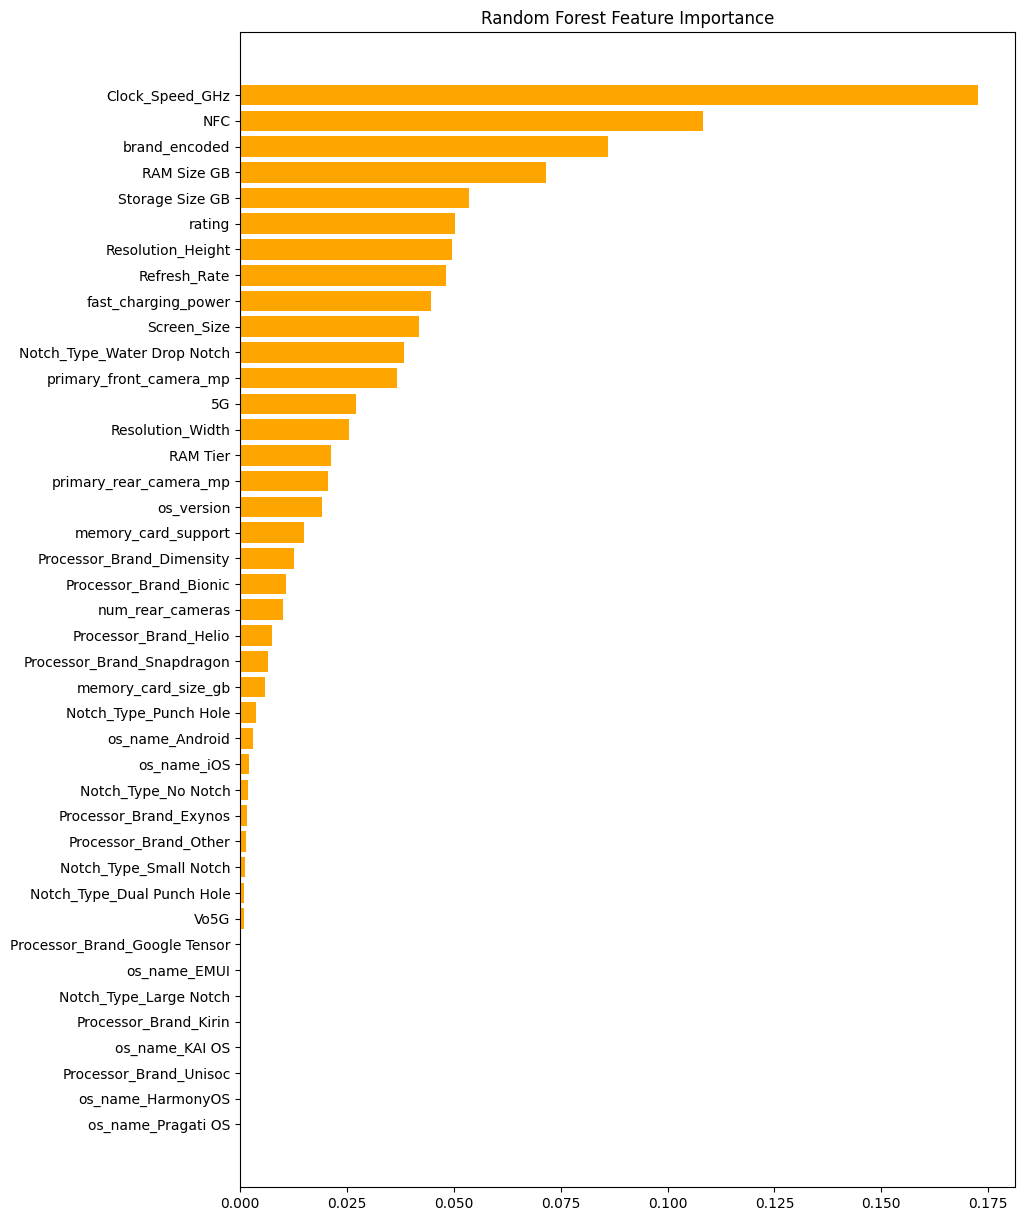

In [208]:
feature_names=x_train_res.columns
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_importance)

plt.figure(figsize=(10,15))
plt.barh(rf_importance['Feature'], rf_importance['Importance'], color='orange')
plt.title("Random Forest Feature Importance")
plt.savefig("feature_importance_random_forest.png", dpi=300, bbox_inches="tight")
plt.gca().invert_yaxis()
plt.show()

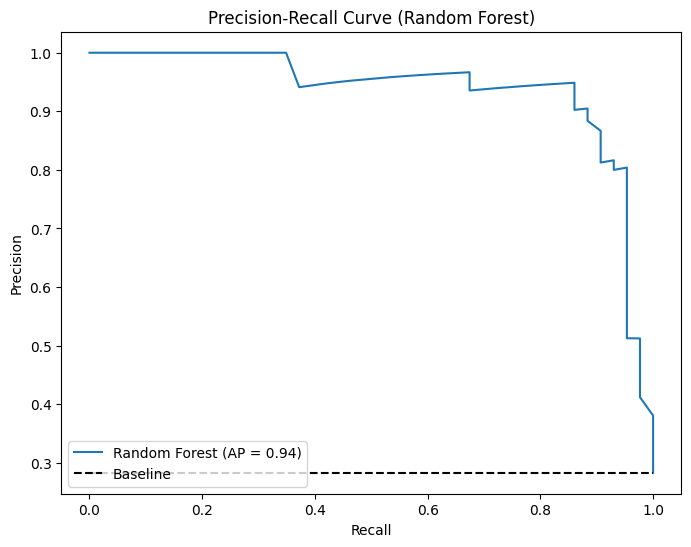

In [209]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_proba_rf)

# Compute average precision (AP)
avg_prec = average_precision_score(y_test, y_proba_rf)

# Plot
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f"Random Forest (AP = {avg_prec:.2f})")

# Baseline: positive class ratio
baseline = y_test.mean()
plt.hlines(y=baseline, xmin=0, xmax=1, colors='k', linestyles='--', label="Baseline")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.legend(loc="lower left")
plt.savefig("AP_curve_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

In [210]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores=cross_val_score(rf_model,df_selected.drop('price',axis=1),df_selected['price'],cv=cv,scoring='accuracy',n_jobs=-1)
print("✅Cross-validation accuracies✅:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

✅Cross-validation accuracies✅: [0.92352941 0.93529412 0.95294118 0.94117647 0.92941176]
Mean CV accuracy: 0.9364705882352942
Std deviation: 0.010120382667108936


=== Classification Report (SMOTE + Gradient Boosting) ===
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       109
           1       0.85      0.93      0.89        43

    accuracy                           0.93       152
   macro avg       0.91      0.93      0.92       152
weighted avg       0.94      0.93      0.94       152

Confusion Matrix:
 [[102   7]
 [  3  40]]
ROC-AUC: 0.9541284403669724


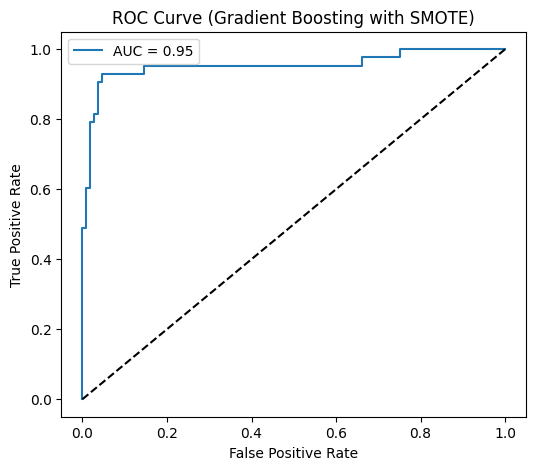

In [211]:
gb_model_smote = XGBClassifier(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
gb_model_smote.fit(x_train_res, y_train_res)

y_pred_gb = gb_model_smote.predict(X_test)
y_proba_gb = gb_model_smote.predict_proba(X_test)[:,1]

print("=== Classification Report (SMOTE + Gradient Boosting) ===")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb))

fpr, tpr, _ = roc_curve(y_test, y_proba_gb)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_gb):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Gradient Boosting with SMOTE)")
plt.legend()
plt.show()

                          Feature  Importance
3                             NFC    0.298687
4                 Clock_Speed_GHz    0.143657
6                 Storage Size GB    0.107480
25    Notch_Type_Water Drop Notch    0.065640
16            memory_card_support    0.053536
1                              5G    0.048937
15        primary_front_camera_mp    0.042072
19                  brand_encoded    0.037518
5                     RAM Size GB    0.033083
10               Resolution_Width    0.025027
33      Processor_Brand_Dimensity    0.022330
11              Resolution_Height    0.021190
9                     Screen_Size    0.012812
17                     os_version    0.012647
39     Processor_Brand_Snapdragon    0.012016
13         primary_rear_camera_mp    0.010518
14               num_rear_cameras    0.010364
8             fast_charging_power    0.009850
0                          rating    0.009738
22            Notch_Type_No Notch    0.007360
12                   Refresh_Rate 

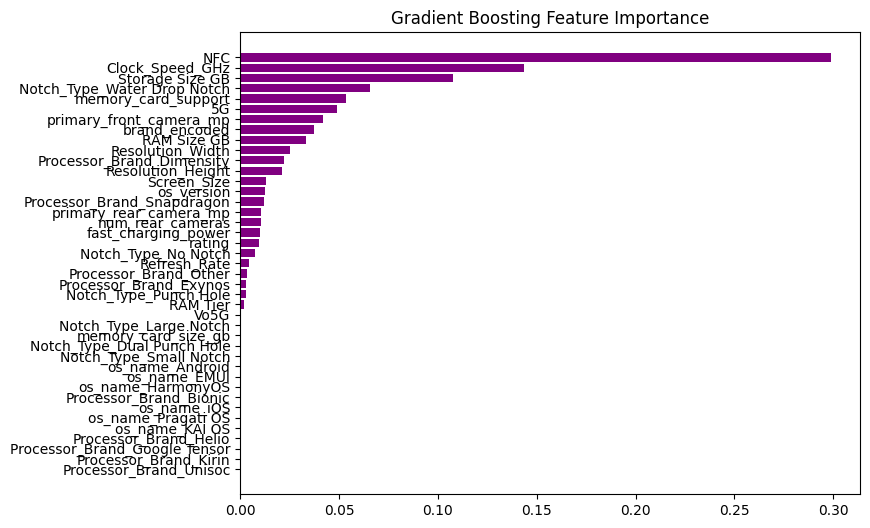

In [212]:
gb_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_model_smote.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(gb_importance)

plt.figure(figsize=(8,6))
plt.barh(gb_importance['Feature'], gb_importance['Importance'], color='purple')
plt.title("Gradient Boosting Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [213]:
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores=cross_val_score(gb_model_smote,df_selected.drop('price',axis=1),df_selected['price'],cv=cv,scoring='accuracy',n_jobs=-1)
print("✅Cross-validation accuracies✅:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std deviation:", np.std(cv_scores))

✅Cross-validation accuracies✅: [0.91764706 0.92352941 0.93529412 0.92352941 0.94705882]
Mean CV accuracy: 0.9294117647058824
Std deviation: 0.010522672835293114


In [214]:
estimator=[]
estimator.append(('Linear Regression',lr_model_smote))
estimator.append(('Random Forest',rf_model))
estimator.append(('Gradient Boosting',gb_model_smote))

In [215]:
VC_hard=VotingClassifier(estimators=estimator,voting='hard',weights=[1,3,1] )
VC_hard

VotingClassifier(estimators=[('Linear Regression',
                              LogisticRegression(random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('Gradient Boosting',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=N...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 weights=[1, 3, 1])

In [216]:
VC_hard.fit(x_train_res,y_train_res)

y_pred_vc=VC_hard.predict(X_test)
y_pred_vc_train = VC_hard.predict(X_train)

print("Classification Report (Voting Classifier - Hard):")
print(classification_report(y_test, y_pred_vc))

cm = confusion_matrix(y_test, y_pred_vc)
print("Confusion Matrix:")
print(cm)
print("Train Accuracy:", accuracy_score(y_train, y_pred_vc_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_vc))
print("Train F1:", f1_score(y_train, y_pred_vc_train,average='macro'))
print("Test F1:", f1_score(y_test, y_pred_vc,average='macro'))

Classification Report (Voting Classifier - Hard):
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       109
           1       0.83      0.91      0.87        43

    accuracy                           0.92       152
   macro avg       0.90      0.92      0.91       152
weighted avg       0.92      0.92      0.92       152

Confusion Matrix:
[[101   8]
 [  4  39]]
Train Accuracy: 1.0
Test Accuracy: 0.9210526315789473
Train F1: 1.0
Test F1: 0.9052959501557633


In [217]:
VC_soft=VotingClassifier(estimators=estimator,voting='soft',weights=[1,3,1])
VC_soft

VotingClassifier(estimators=[('Linear Regression',
                              LogisticRegression(random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('Gradient Boosting',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=N...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft', weights=[1, 3, 1])

In [218]:
VC_soft.fit(x_train_res,y_train_res)

y_pred_vc = VC_soft.predict(X_test)
y_pred_vc_train = VC_soft.predict(X_train)

print("Classification Report (Voting Classifier - Soft):")
print(classification_report(y_test, y_pred_vc))


cm = confusion_matrix(y_test, y_pred_vc)
print("Confusion Matrix:")
print(cm)
print("Train Accuracy:", accuracy_score(y_train, y_pred_vc_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_vc))
print("Train F1:", f1_score(y_train, y_pred_vc_train))
print("Test F1:", f1_score(y_test, y_pred_vc))

Classification Report (Voting Classifier - Soft):
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       109
           1       0.82      0.93      0.87        43

    accuracy                           0.92       152
   macro avg       0.89      0.92      0.91       152
weighted avg       0.93      0.92      0.92       152

Confusion Matrix:
[[100   9]
 [  3  40]]
Train Accuracy: 1.0
Test Accuracy: 0.9210526315789473
Train F1: 1.0
Test F1: 0.8695652173913043



=== KNN with SMOTE ===
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       109
           1       0.71      0.86      0.78        43

    accuracy                           0.86       152
   macro avg       0.83      0.86      0.84       152
weighted avg       0.88      0.86      0.87       152

Confusion Matrix:
 [[94 15]
 [ 6 37]]
ROC-AUC: 0.9151909537017282


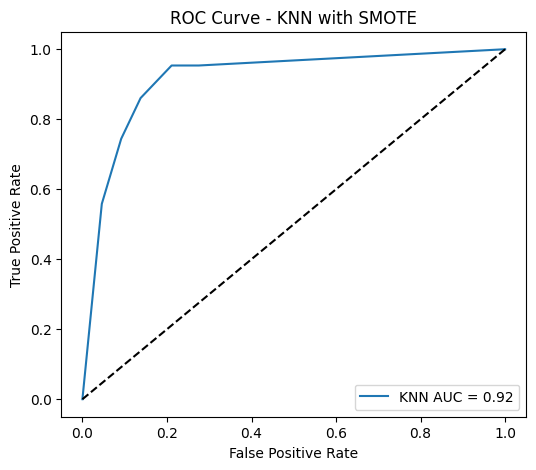

In [219]:
knn_model_smote=KNeighborsClassifier(n_neighbors=5)
knn_model_smote.fit(x_train_res,y_train_res)
y_pred_knn=knn_model_smote.predict(X_test)
y_proba_knn=knn_model_smote.predict_proba(X_test)[:,1]
print("\n=== KNN with SMOTE ===")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_knn))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"KNN AUC = {roc_auc_score(y_test, y_proba_knn):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN with SMOTE")
plt.legend()
plt.show()

Classification Report (SVM + SMOTE):
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       109
           1       0.76      0.91      0.83        43

    accuracy                           0.89       152
   macro avg       0.86      0.90      0.88       152
weighted avg       0.91      0.89      0.90       152

Confusion Matrix:
[[97 12]
 [ 4 39]]
ROC-AUC: 0.9662897375720076


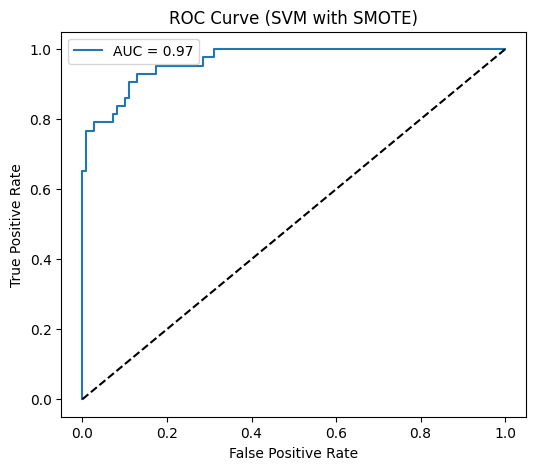

In [220]:
svm_model_smote=SVC(C=1,kernel='linear',probability=True)
svm_model_smote.fit(x_train_res,y_train_res)
y_pred_svm=svm_model_smote.predict(X_test)
y_proba_svm=svm_model_smote.predict_proba(X_test)[:,1]
print("Classification Report (SVM + SMOTE):")
print(classification_report(y_test, y_pred_svm))

# ✅ Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm)

# ✅ ROC-AUC score
roc_auc = roc_auc_score(y_test,y_proba_svm)
print("ROC-AUC:", roc_auc)

# ✅ Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svm)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVM with SMOTE)")
plt.legend()
plt.show()

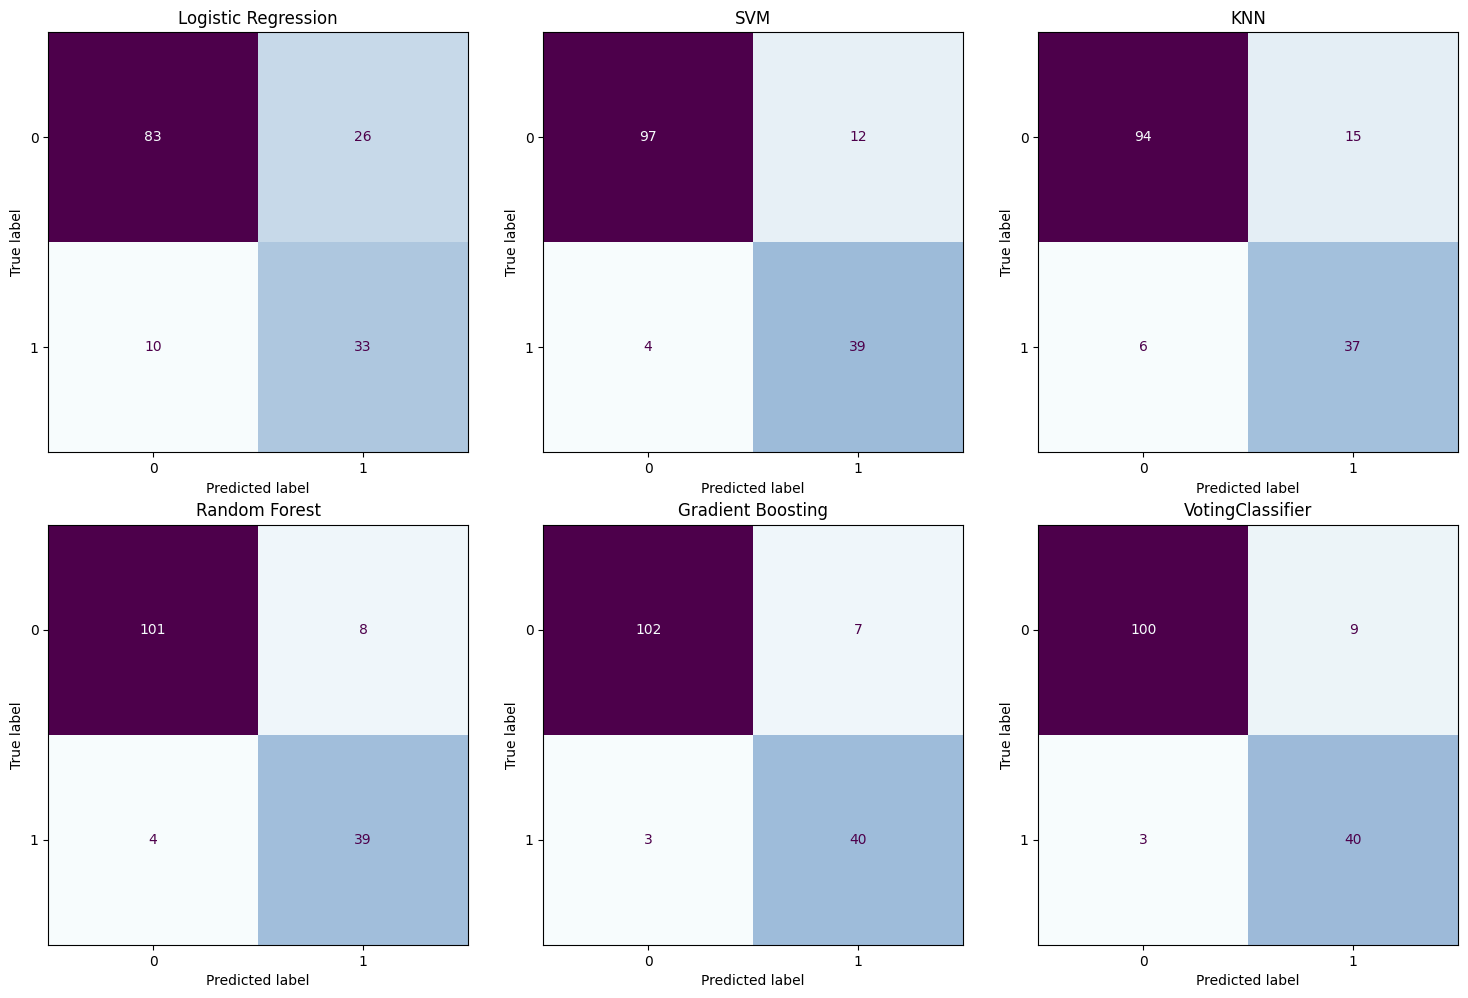

In [221]:
models_to_plot=[
    'LogisticRegression',
    'RandomForestClassifier',
    'GradientBoosting',
    'KNN',
    'SVM',
    'VotingClassifier'
]

from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Logistic Regression": lr_model_smote,
    "SVM": svm_model_smote,
    "KNN": knn_model_smote,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model_smote,
    'VotingClassifier':VC_soft
}

# Predictions for each model
y_preds = {}
for name, model in models.items():
    y_preds[name] = model.predict(X_test)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot confusion matrices
for ax, (name, model) in zip(axes, models.items()):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_preds[name],
        ax=ax,
        cmap="BuPu",
        colorbar=False
    )
    ax.set_title(name)

# Remove unused subplot (since we have 5 models, not 6)
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

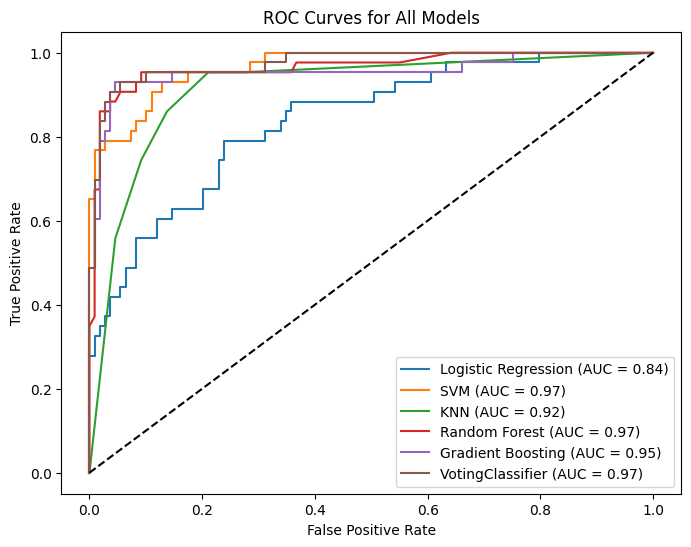

In [222]:
from sklearn.metrics import roc_curve, roc_auc_score

models = {
    "Logistic Regression": lr_model_smote,
    "SVM": svm_model_smote,
    "KNN": knn_model_smote,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model_smote,
    'VotingClassifier':VC_soft
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Select correct test set

    # Get probabilities (probability estimates or decision function)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # for SVM if probability=False (but you used probability=True, so fine)
        y_proba = model.decision_function(X_test)

    # Compute ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.show()

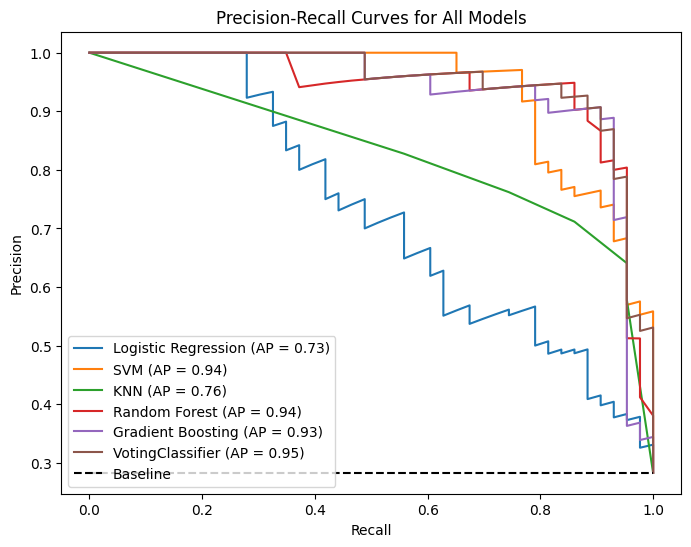

In [223]:
from sklearn.metrics import precision_recall_curve, average_precision_score
metrics=[]
models = {
    "Logistic Regression": lr_model_smote,
    "SVM": svm_model_smote,
    "KNN": knn_model_smote,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model_smote,
    'VotingClassifier':VC_soft
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Select correct test set

    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # For SVM with decision_function
        y_proba = model.decision_function(X_test)

    # Compute Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_prec = average_precision_score(y_test, y_proba)

    plt.plot(recall, precision, label=f"{name} (AP = {avg_prec:.2f})")

# Baseline
plt.hlines(y=sum(y_test) / len(y_test), xmin=0, xmax=1, colors='k', linestyles='--', label="Baseline")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for All Models")
plt.legend(loc="lower left")
plt.show()

In [224]:
lr_model_smote.fit(x_train_res, y_train_res)
svm_model_smote.fit(x_train_res, y_train_res)
knn_model_smote.fit(x_train_res, y_train_res)
rf_model.fit(x_train_res, y_train_res)
gb_model_smote.fit(x_train_res, y_train_res)
VC_soft.fit(x_train_res,y_train_res)

joblib.dump(lr_model_smote, "logistic_regression_smote.pkl")
joblib.dump(svm_model_smote, "svm_smote.pkl")
joblib.dump(knn_model_smote, "knn_smote.pkl")
joblib.dump(rf_model, "random_forest_smote.pkl")
joblib.dump(gb_model_smote, "gradient_boosting_smote.pkl")
joblib.dump(VC_soft,'VotingClassifierSoft.pkl')
joblib.dump(te,'brand_target_encoder.pkl')

print("✅ All models saved successfully!")

loaded_vc=joblib.load('VotingClassifierSoft.pkl')
y_pred_loaded = loaded_vc.predict(X_test)
print("Voting Classifier (Soft) Test Accuracy (Loaded Model):", (y_pred_loaded == y_test).mean())

✅ All models saved successfully!
Voting Classifier (Soft) Test Accuracy (Loaded Model): 0.9210526315789473


In [225]:
metrics=[]
for name, model in models.items():
    # Pick correct test set

    # Predictions
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # For models like SVM without predict_proba by default
        try:
            y_proba = model.decision_function(X_test)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # scale 0-1
        except:
            y_proba = y_pred  # fallback

    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f"{name.replace(' ', '_').lower()}_confusion_matrix.png")
    plt.close()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc_value = auc(fpr, tpr)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_value:.2f}")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.savefig(f"s{name.replace(' ', '_').lower()}_roc.png")
    plt.close()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_pr = average_precision_score(y_test, y_proba)
    plt.figure(figsize=(5,4))
    plt.plot(recall, precision, label=f"AP = {avg_pr:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    plt.legend()
    plt.savefig(f"{name.replace(' ', '_').lower()}_pr.png")
    plt.close()

    # Save metrics
    metrics.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision (Class 1)": report["1"]["precision"],
        "Recall (Class 1)": report["1"]["recall"],
        "F1-score (Class 1)": report["1"]["f1-score"],
        "ROC-AUC": roc_auc,
        "Avg Precision (PR AUC)": avg_pr
    })

# =============================
# 4. Save Metrics as CSV
# =============================
df_metrics = pd.DataFrame(metrics)
df_metrics.to_csv("model_metrics.csv", index=False)
print("📊 Metrics saved to saved_models/model_metrics.csv")
print(df_metrics)

📊 Metrics saved to saved_models/model_metrics.csv
                 Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0  Logistic Regression  0.763158             0.559322          0.767442   
1                  SVM  0.894737             0.764706          0.906977   
2                  KNN  0.861842             0.711538          0.860465   
3        Random Forest  0.921053             0.829787          0.906977   
4    Gradient Boosting  0.934211             0.851064          0.930233   
5     VotingClassifier  0.921053             0.816327          0.930233   

   F1-score (Class 1)  ROC-AUC  Avg Precision (PR AUC)  
0            0.647059  0.96629                0.729919  
1            0.829787  0.96629                0.935575  
2            0.778947  0.96629                0.759146  
3            0.866667  0.96629                0.935600  
4            0.888889  0.96629                0.933963  
5            0.869565  0.96629                0.949421  
